<a href="https://www.kaggle.com/code/barzcan/experiment-on-alexnet-with-different-shapes?scriptVersionId=128034962" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part 1

This code generates a dataset of images consisting of various shapes like ovals, rectangles, triangles, polygons, and stars. Each shape is saved in a separate folder with the name of the shape.

The shapes are generated by calling functions like random_oval, random_rectangle, random_triangle, random_polygon, and random_star, which take a blank image as input and draw the respective shape on it with randomly generated parameters like size, color, and position. These functions use OpenCV library functions like cv2.ellipse, cv2.rectangle, cv2.fillPoly, etc., to draw the shapes.

To add some noise to the images, the function add_salt_pepper_noise is used, which adds randomly placed white and black pixels to the image based on a probability value.

The function generate_images is used to generate a specified number of images for a given shape by calling the respective shape function and adding noise to it. The function saves each generated image in the corresponding folder using the cv2.imwrite function.

The function create_directory_structure creates the required directory structure inside the "images" folder.

In the main function, a total of 8000 images (1000 images for each shape) are generated and saved using the generate_images function. The images are then split into training and testing sets using the train_test_split function from the scikit-learn library. The input images are stored in the list X, and the corresponding output labels are stored in the list y. These lists are then saved as numpy arrays using the np.save function.

In [1]:
import os
import cv2
import numpy as np
from random import randint, random
from sklearn.model_selection import train_test_split

def random_color():
    return randint(128, 255)

def random_polygon(image, vertices):
    center = (randint(10, 118), randint(10, 118))
    radius = randint(5, 60)
    color = random_color()
    angle = 2 * np.pi / vertices

    pts = []
    for i in range(vertices):
        x = int(center[0] + radius * np.cos(i * angle))
        y = int(center[1] + radius * np.sin(i * angle))
        pts.append((x, y))

    pts = np.array(pts, np.int32)
    cv2.fillPoly(image, [pts], color)

def random_oval(image):
    thickness = -1
    center = (randint(10, 118), randint(10, 118))
    axes = (randint(5, 60), randint(5, 60))
    angle = randint(0, 360)
    color = random_color()
    cv2.ellipse(image, center, axes, angle, 0, 360, color, thickness)

def random_rectangle(image):
    thickness = -1
    pt1 = (randint(5, 123), randint(5, 123))
    pt2 = (randint(5, 123), randint(5, 123))
    color = random_color()
    cv2.rectangle(image, pt1, pt2, color, thickness)

def random_triangle(image):
    thickness = -1
    pts = np.array([[randint(5, 123), randint(5, 123)], [randint(5, 123), randint(5, 123)], [randint(5, 123), randint(5, 123)]], np.int32)
    color = random_color()
    cv2.fillPoly(image, [pts], color)



def random_star(image, vertices):
    center = (randint(10, 118), randint(10, 118))
    inner_radius = randint(5, 30)
    outer_radius = randint(inner_radius + 1, 60)
    color = random_color()

    angle = 2 * np.pi / vertices
    inner_pts = []
    outer_pts = []

    for i in range(vertices):
        inner_x = int(center[0] + inner_radius * np.cos(i * angle))
        inner_y = int(center[1] + inner_radius * np.sin(i * angle))
        outer_x = int(center[0] + outer_radius * np.cos(i * angle + angle / 2))
        outer_y = int(center[1] + outer_radius * np.sin(i * angle + angle / 2))
        inner_pts.append((inner_x, inner_y))
        outer_pts.append((outer_x, outer_y))

    pts = [pt for pair in zip(inner_pts, outer_pts) for pt in pair]
    pts = np.array(pts, np.int32)
    cv2.fillPoly(image, [pts], color)

def add_salt_pepper_noise(image, prob):
    row, col = image.shape
    sp_image = np.copy(image)
    num_salt = np.ceil(prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    sp_image[tuple(coords)] = 255

    num_pepper = np.ceil(prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    sp_image[tuple(coords)] = 0

    return sp_image

def generate_images(num_images, shape_func, shape_name):
    for i in range(num_images):
        image = np.zeros((128, 128), dtype=np.uint8)
        shape_func(image)
        image_with_noise = add_salt_pepper_noise(image, 0.01)
        cv2.imwrite(f'images/{shape_name}/{shape_name}_{i:04d}.png', image_with_noise)

def create_directory_structure():
    os.makedirs("images", exist_ok=True)
    for shape in ["oval", "rectangle", "triangle", "poly5", "poly6", "poly7", "star5", "star8"]:
        os.makedirs(f"images/{shape}", exist_ok=True)

def main():
    create_directory_structure()
    np.random.seed(42)
    
    num_images = 1000
    generate_images(num_images, random_oval, "oval")
    generate_images(num_images, random_rectangle, "rectangle")
    generate_images(num_images, random_triangle, "triangle")
    for sides in [5, 6, 7]:
        generate_images(num_images, lambda img: random_polygon(img, sides), f"poly{sides}")
    generate_images(num_images, lambda img: random_star(img, 5), "star5")
    generate_images(num_images, lambda img: random_star(img, 8), "star8")

    # Split images into training and test sets
    X = []
    y = []
    for i, shape in enumerate(["oval", "rectangle", "triangle", "poly5", "poly6", "poly7", "star5", "star8"]):
        for j in range(num_images):
            img = cv2.imread(f'images/{shape}/{shape}_{j:04d}.png')
            X.append(img)
            y.append(i)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Save the train and test sets
    np.save('X_train.npy', X_train)
    np.save('X_test.npy', X_test)
    np.save('y_train.npy', y_train)
    np.save('y_test.npy', y_test)


main()

The code first imports the os and IPython.display modules. The os module is used to navigate the file system, while the IPython.display module is used to display images in the Jupyter notebook. The random module is also imported to randomly choose images from each shape category.

The shapes list contains the names of all the shape categories for which sample images need to be displayed. For each shape in the shapes list, the code prints the name of the shape and then selects three random images from the corresponding shape folder using the os.listdir function and the random.choice function. It then displays each of the three randomly selected images using the IPython.display.Image function.

This code can be helpful to visualize the images in the dataset and verify that they were generated correctly. It can also help to get a sense of the variety of shapes and noise in the dataset.


Sample images for oval:


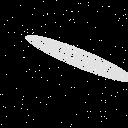

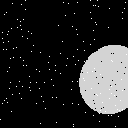

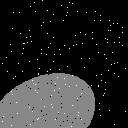


Sample images for poly5:


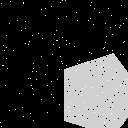

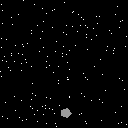

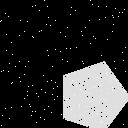


Sample images for poly6:


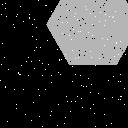

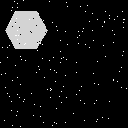

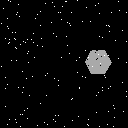


Sample images for poly7:


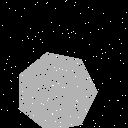

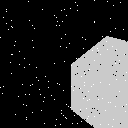

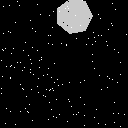


Sample images for rectangle:


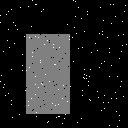

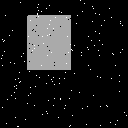

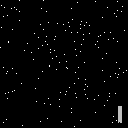


Sample images for star5:


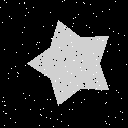

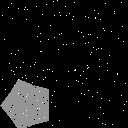

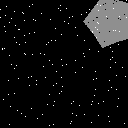


Sample images for star8:


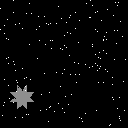

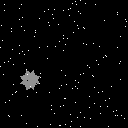

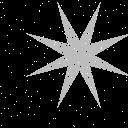


Sample images for triangle:


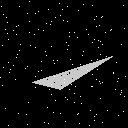

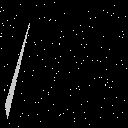

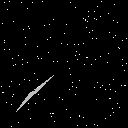

In [2]:
import os
from IPython.display import Image, display
import random

shapes = ['oval', 'poly5', 'poly6', 'poly7', 'rectangle', 'star5', 'star8', 'triangle']

for shape in shapes:
    print(f"\nSample images for {shape}:")
    files = os.listdir(f'./images/{shape}')
    for i in range(3):
        file = random.choice(files)
        display(Image(f'./images/{shape}/{file}'))


In [3]:
%ls

X_test.npy  X_train.npy  __notebook__.ipynb  images/  y_test.npy  y_train.npy


This code trains a convolutional neural network (CNN) based on the AlexNet architecture on the dataset of images generated in the previous code cells. The CNN is trained with different combinations of activation functions and optimizers.

First, the code sets up the image data generator using the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module. It rescales the pixel values of the input images to the range of 0 to 1 and splits the data into training and validation sets with a validation split of 0.2. The training and validation sets are generated using the flow_from_directory method of the data generator object, which reads the images from the directory structure created in the previous code cell.

The AlexNet architecture is defined using the create_alexnet function. It has eight convolutional and fully connected layers with the specified activation function and a softmax output layer with 8 output nodes corresponding to the 8 shape classes in the dataset.

The fit method is used to train the model on the training set with the specified optimizer and activation function. The loss function used is categorical cross-entropy, and the metric used to evaluate the model is accuracy. The training is performed for 50 epochs, and the history of loss and accuracy is saved.

For each activation function, the code trains the network with three different optimizers: Adam, SGD, and RMSprop. For each combination of activation function and optimizer, the code plots the training and validation loss and accuracy per epoch using the matplotlib.pyplot module. The plots are displayed at the end of each training run.

Overall, this code helps in selecting the best combination of activation function and optimizer for training the CNN on the dataset of images. It also helps in evaluating the performance of the trained model by visualizing the training and validation loss and accuracy.

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
Training with relu activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 14s 31ms/step - loss: 2.0830 - accuracy: 0.1200 - val_loss: 2.0798 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0805 - accuracy: 0.1153 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0803 - accuracy: 0.1194 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0803 - accuracy: 0.1158 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0800 - accuracy: 0.1252 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0800 - accuracy: 0.1192 - val_loss: 2.0795 - val_accuracy: 0.12

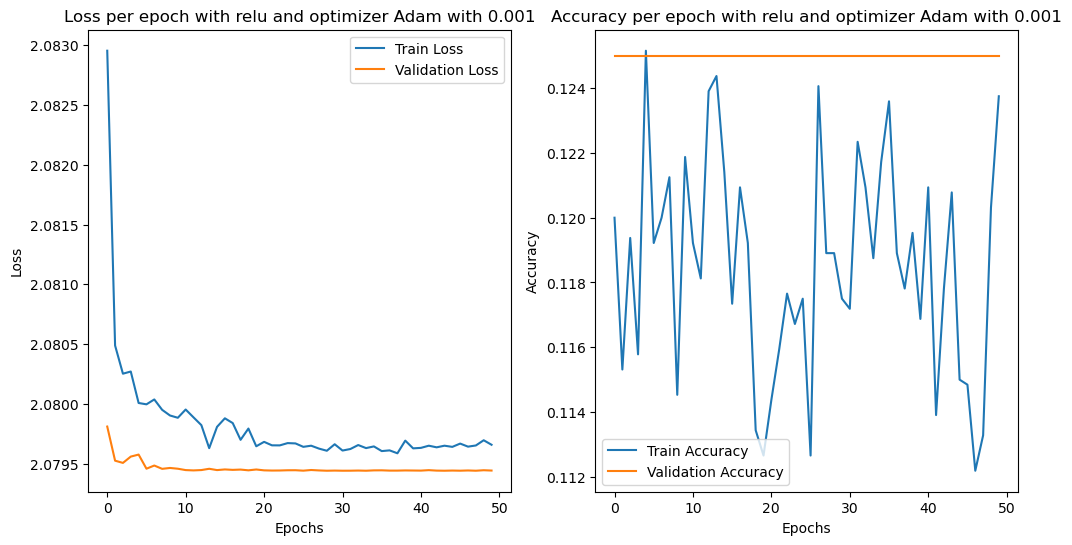

Training with relu activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 1.9625 - accuracy: 0.1741 - val_loss: 1.7019 - val_accuracy: 0.2419
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 1.5545 - accuracy: 0.3219 - val_loss: 1.3399 - val_accuracy: 0.4444
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 1.0278 - accuracy: 0.5772 - val_loss: 0.8124 - val_accuracy: 0.6875
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 0.6280 - accuracy: 0.7616 - val_loss: 0.5793 - val_accuracy: 0.7994
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 0.4033 - accuracy: 0.8569 - val_loss: 0.3190 - val_accuracy: 0.8963
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 0.2488 - accuracy: 0.9178 - val_loss: 0.3463 - val_accuracy: 0.8756
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 0.1796

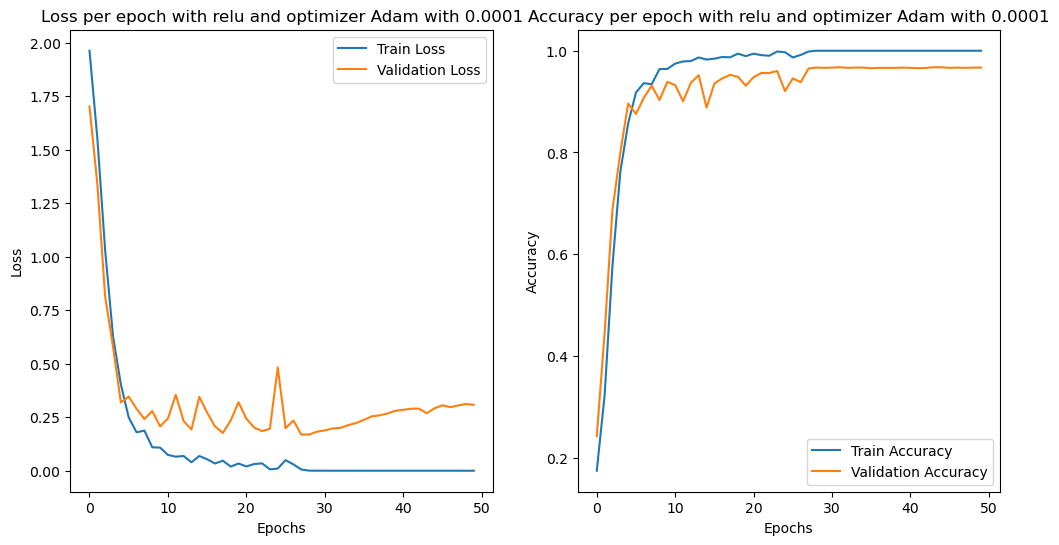

Training with relu activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 2.0758 - accuracy: 0.1353 - val_loss: 2.0626 - val_accuracy: 0.1569
Epoch 2/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0058 - accuracy: 0.1933 - val_loss: 1.9357 - val_accuracy: 0.2350
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 1.8915 - accuracy: 0.2278 - val_loss: 1.8205 - val_accuracy: 0.2694
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 1.7479 - accuracy: 0.2898 - val_loss: 1.6381 - val_accuracy: 0.3575
Epoch 5/50
200/200 [==============================] - 5s 26ms/step - loss: 1.6019 - accuracy: 0.3505 - val_loss: 1.5214 - val_accuracy: 0.3794
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 1.5158 - accuracy: 0.3708 - val_loss: 1.4905 - val_accuracy: 0.4031
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 1.4472 

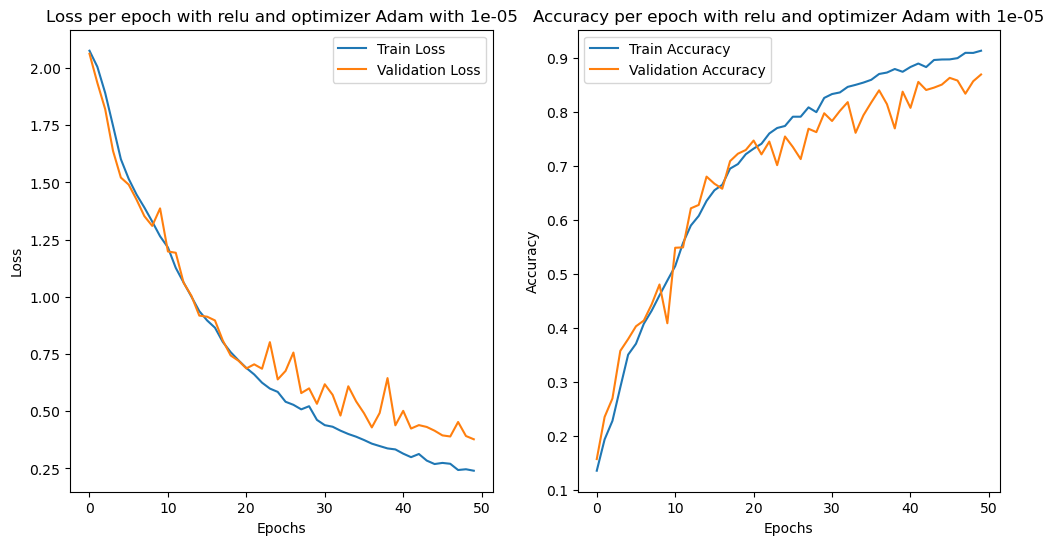

Training with sigmoid activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 3.7841 - accuracy: 0.1258 - val_loss: 2.3398 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.6688 - accuracy: 0.1281 - val_loss: 2.3286 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 2.5357 - accuracy: 0.1316 - val_loss: 2.1880 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 2.5115 - accuracy: 0.1242 - val_loss: 2.3194 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.4575 - accuracy: 0.1242 - val_loss: 2.2068 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 2.4579 - accuracy: 0.1234 - val_loss: 2.1113 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.40

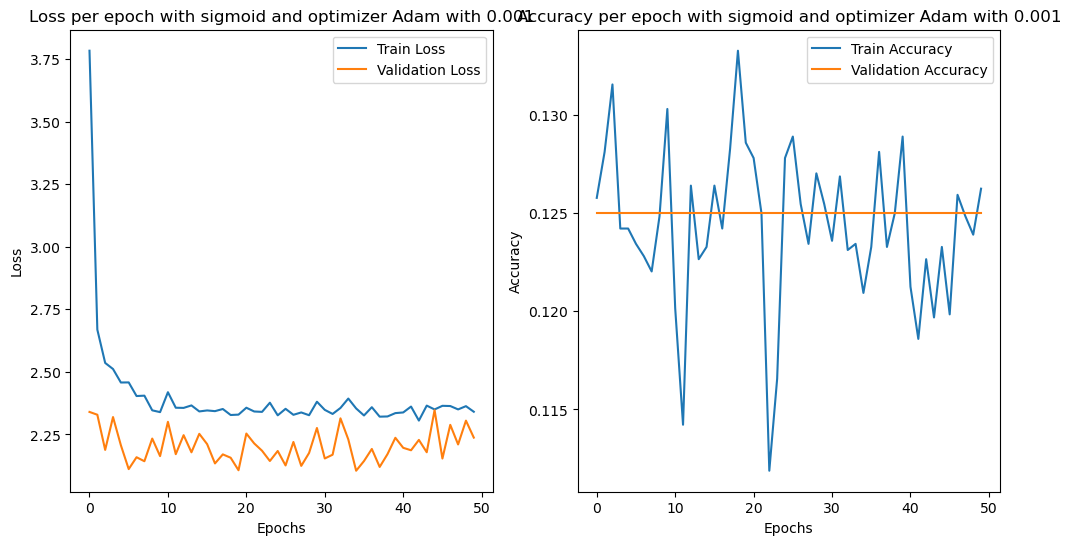

Training with sigmoid activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.4807 - accuracy: 0.1267 - val_loss: 2.1167 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 26ms/step - loss: 2.2515 - accuracy: 0.1261 - val_loss: 2.0985 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 2.1958 - accuracy: 0.1298 - val_loss: 2.1248 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 2.1850 - accuracy: 0.1197 - val_loss: 2.0965 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.1426 - accuracy: 0.1295 - val_loss: 2.0922 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 2.1398 - accuracy: 0.1244 - val_loss: 2.0927 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 2.1

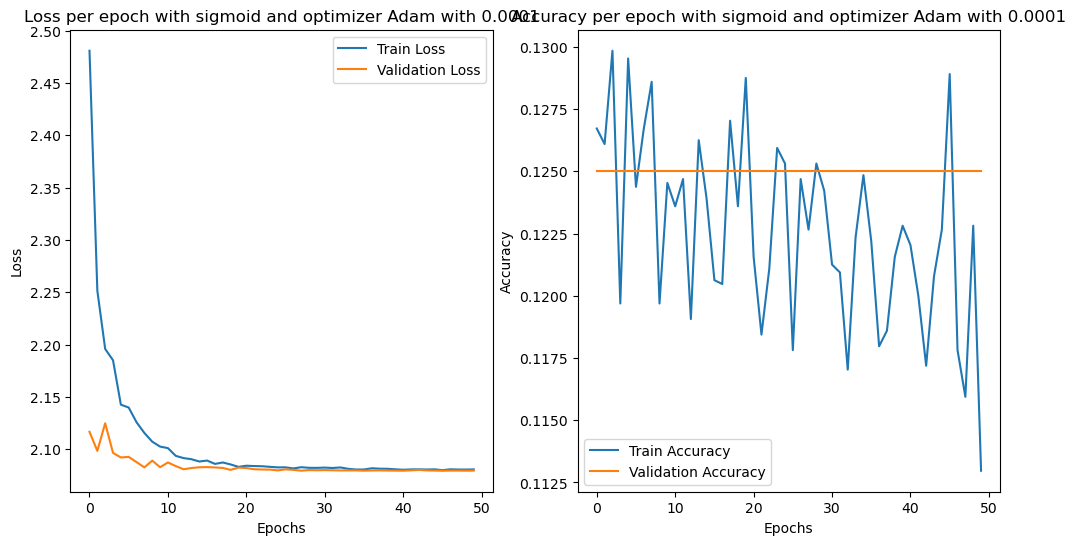

Training with sigmoid activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 2.3282 - accuracy: 0.1278 - val_loss: 2.0894 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.2705 - accuracy: 0.1306 - val_loss: 2.0959 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 2.2448 - accuracy: 0.1239 - val_loss: 2.0855 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 2.2209 - accuracy: 0.1227 - val_loss: 2.0868 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 2.1992 - accuracy: 0.1214 - val_loss: 2.0940 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 2.1994 - accuracy: 0.1236 - val_loss: 2.0823 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 2.18

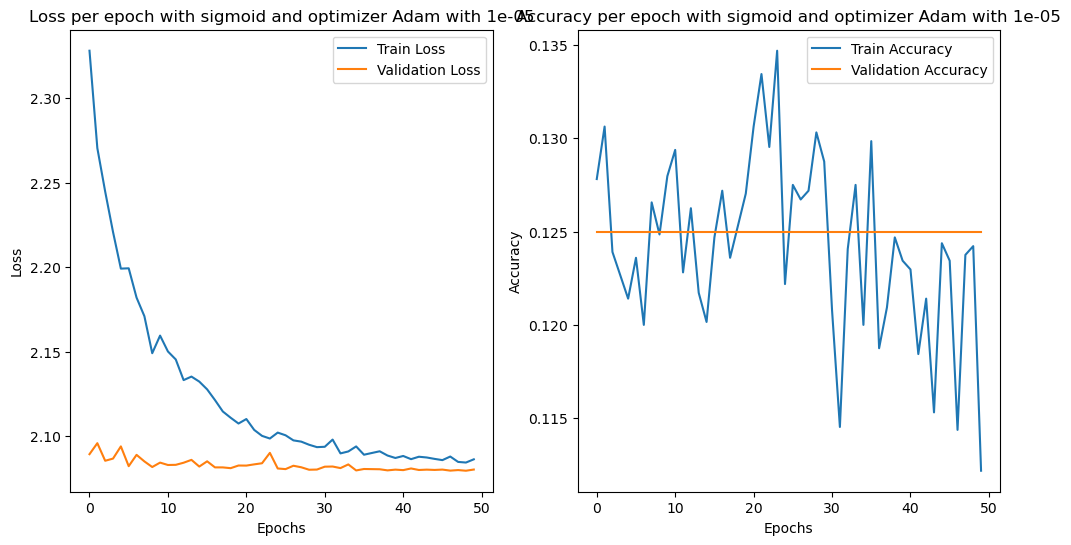

Training with tanh activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 5.0302 - accuracy: 0.1248 - val_loss: 3.1747 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 3.6888 - accuracy: 0.1197 - val_loss: 2.9947 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 3.4090 - accuracy: 0.1217 - val_loss: 2.3721 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 3.3367 - accuracy: 0.1217 - val_loss: 2.6696 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 7s 33ms/step - loss: 3.2570 - accuracy: 0.1238 - val_loss: 2.8855 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 3.1035 - accuracy: 0.1184 - val_loss: 2.4601 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 3.1142 

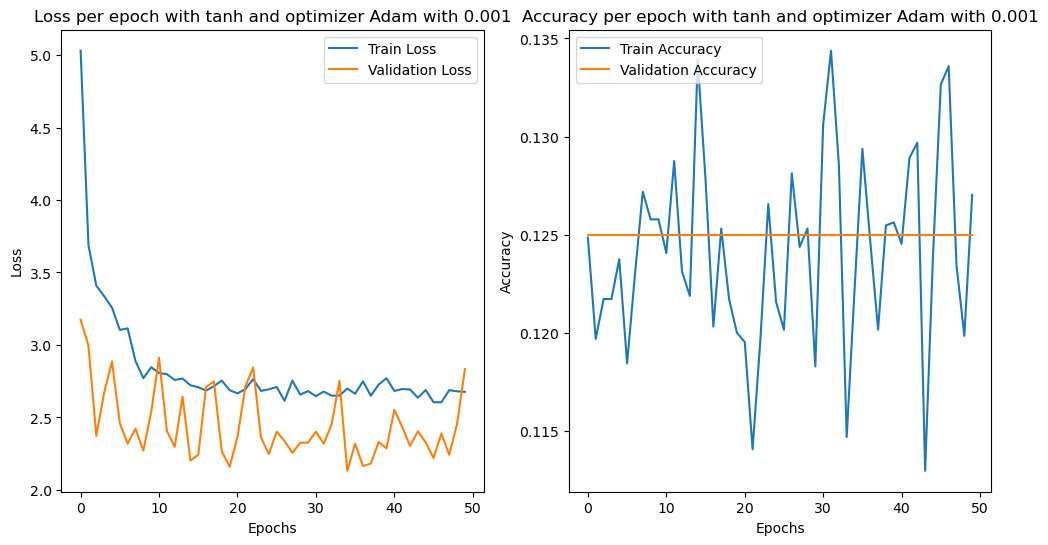

Training with tanh activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0856 - accuracy: 0.2308 - val_loss: 1.6981 - val_accuracy: 0.3088
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 1.1654 - accuracy: 0.5587 - val_loss: 0.7730 - val_accuracy: 0.7369
Epoch 3/50
200/200 [==============================] - 6s 31ms/step - loss: 0.4918 - accuracy: 0.8236 - val_loss: 0.4243 - val_accuracy: 0.8587
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 0.2423 - accuracy: 0.9173 - val_loss: 0.4851 - val_accuracy: 0.8381
Epoch 5/50
200/200 [==============================] - 5s 26ms/step - loss: 0.1603 - accuracy: 0.9480 - val_loss: 0.3242 - val_accuracy: 0.8925
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 0.1318 - accuracy: 0.9595 - val_loss: 0.6140 - val_accuracy: 0.8431
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 0.1316

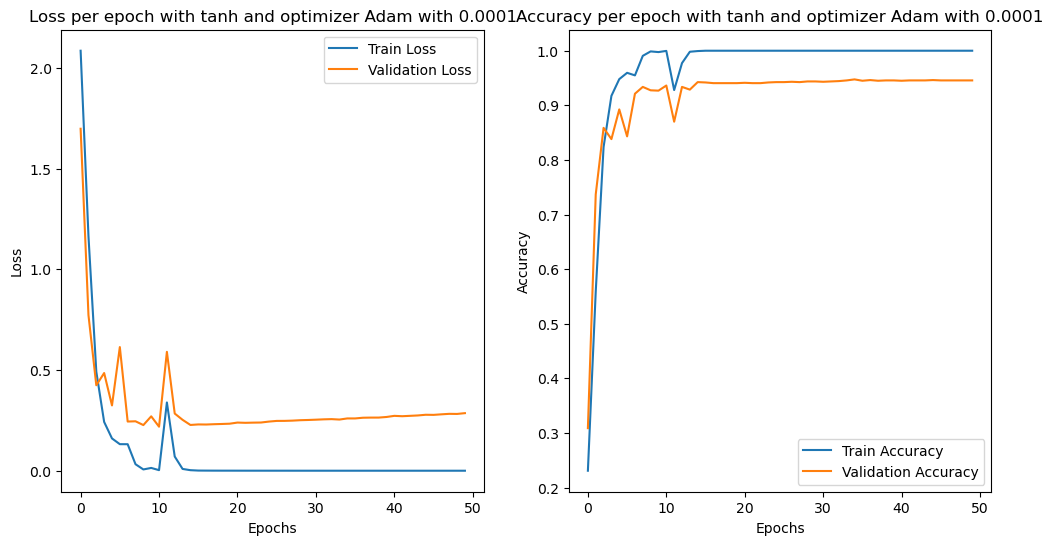

Training with tanh activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 29ms/step - loss: 1.9506 - accuracy: 0.2145 - val_loss: 1.7932 - val_accuracy: 0.2681
Epoch 2/50
200/200 [==============================] - 5s 26ms/step - loss: 1.6432 - accuracy: 0.3464 - val_loss: 1.4991 - val_accuracy: 0.4212
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 1.3780 - accuracy: 0.4594 - val_loss: 1.3269 - val_accuracy: 0.4700
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 1.2019 - accuracy: 0.5437 - val_loss: 1.2310 - val_accuracy: 0.5250
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 1.0953 - accuracy: 0.5898 - val_loss: 1.1006 - val_accuracy: 0.6288
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 0.9783 - accuracy: 0.6403 - val_loss: 1.0383 - val_accuracy: 0.6169
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 0.8687 

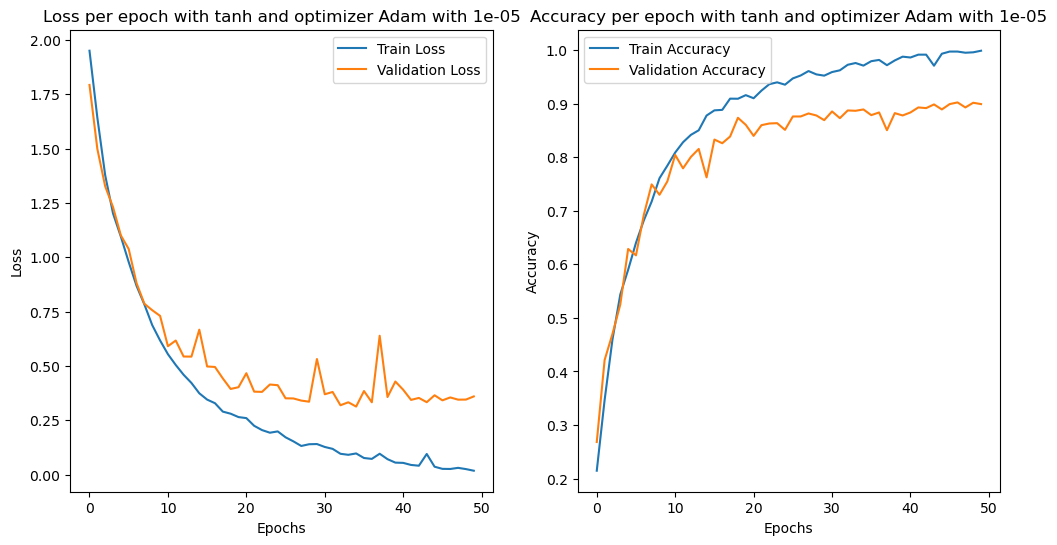

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras.optimizers import SGD,Adam,RMSprop
#from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
data_dir = "images/"
img_width, img_height = 128, 128
batch_size = 32

# Split data into training and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

# Define AlexNet architecture
def create_alexnet(input_shape, num_classes, activation):
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11), activation=activation, input_shape=input_shape, strides=(4, 4), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), activation=activation, strides=(1, 1), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), activation=activation, strides=(1, 1), padding='same'),
        Conv2D(384, (3, 3), activation=activation, strides=(1, 1), padding='same'),
        Conv2D(256, (3, 3), activation=activation, strides=(1, 1), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation=activation),
        Dropout(0.5),
        Dense(4096, activation=activation),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

'''
# Define learning rate adjustment schemes
def lr_schedule_1(epoch, lr):
    if epoch < 20:
        return lr
    elif epoch < 40:
        return lr * 0.1
    else:
        return lr * 0.01

def lr_schedule_2(epoch, lr):
    return lr * (1 / (1 + 0.1 * epoch))
'''

# Train the network with different learning rate adjustment schemes and activation functions
num_classes = 8
input_shape = (img_width, img_height, 1)
#learning_rate_schedules = [lr_schedule_1, lr_schedule_2]
activations = ['relu', 'sigmoid', 'tanh']
#optimizers=[Adam(learning_rate=0.001),Adam(learning_rate=0.0001),Adam(learning_rate=0.00001),SGD(learning_rate=0.001),SGD(learning_rate=0.0001),SGD(learning_rate=0.00001),RMSprop(learning_rate=0.001),RMSprop(learning_rate=0.0001),RMSprop(learning_rate=0.00001)]
optimizers = [
    tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    tf.keras.optimizers.legacy.Adam(learning_rate=0.00001),
    tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
    tf.keras.optimizers.legacy.SGD(learning_rate=0.0001),
    tf.keras.optimizers.legacy.SGD(learning_rate=0.00001),
    tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001),
    tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001),
    tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001)
]


adams=optimizers[:3]
sgds=optimizers[3:6]
rmsprops=optimizers[6:]

for activation in activations:
    for optimizer in adams:
        initial_lr=round(float(optimizer.learning_rate),5)
        optimizer._name = 'Adam'
        print(f"Training with {activation} activation and optimizer {optimizer._name} with {initial_lr}")
        model = create_alexnet(input_shape, num_classes, activation)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


        history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

        # Plot loss and accuracy per epoch
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.show()

Training with relu activation and optimizer SGD with 0.001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.0794 - accuracy: 0.1283 - val_loss: 2.0793 - val_accuracy: 0.1075
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0792 - accuracy: 0.1283 - val_loss: 2.0792 - val_accuracy: 0.1112
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0794 - accuracy: 0.1287 - val_loss: 2.0790 - val_accuracy: 0.1131
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0792 - accuracy: 0.1336 - val_loss: 2.0788 - val_accuracy: 0.1200
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0791 - accuracy: 0.1272 - val_loss: 2.0787 - val_accuracy: 0.1338
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0788 - accuracy: 0.1267 - val_loss: 2.0785 - val_accuracy: 0.1312
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0786 -

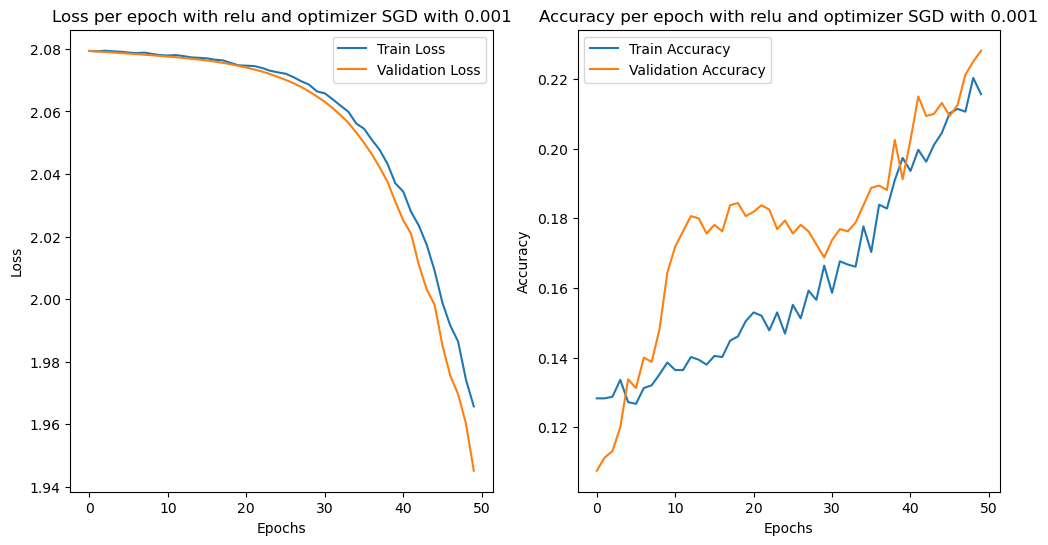

Training with relu activation and optimizer SGD with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.0798 - accuracy: 0.1281 - val_loss: 2.0797 - val_accuracy: 0.1125
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0794 - accuracy: 0.1278 - val_loss: 2.0797 - val_accuracy: 0.1131
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 2.0794 - accuracy: 0.1217 - val_loss: 2.0797 - val_accuracy: 0.1131
Epoch 4/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0800 - accuracy: 0.1214 - val_loss: 2.0796 - val_accuracy: 0.1119
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0796 - accuracy: 0.1266 - val_loss: 2.0796 - val_accuracy: 0.1119
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0792 - accuracy: 0.1280 - val_loss: 2.0796 - val_accuracy: 0.1125
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0797 

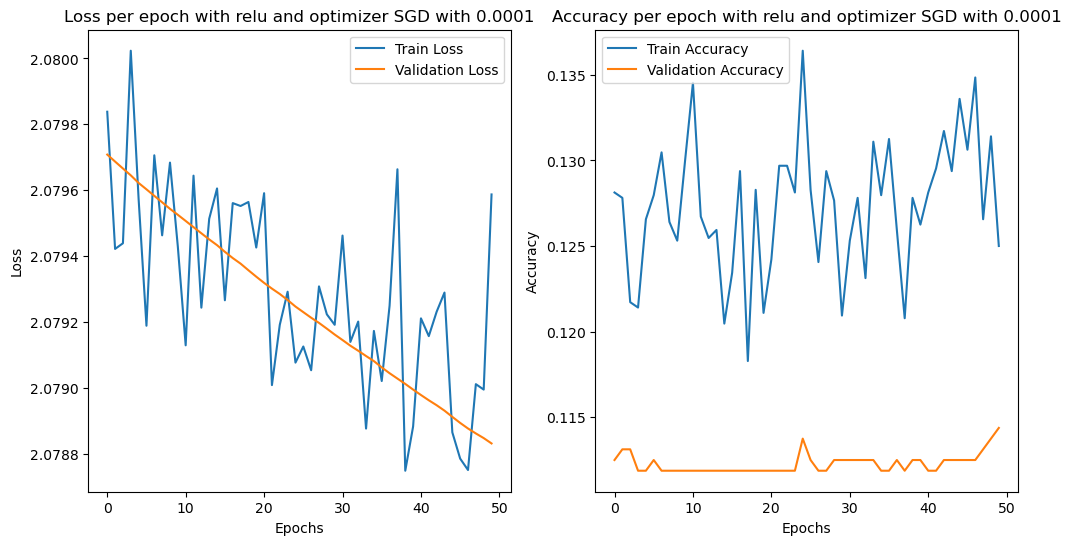

Training with relu activation and optimizer SGD with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 33ms/step - loss: 2.0795 - accuracy: 0.1184 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0797 - accuracy: 0.1233 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 27ms/step - loss: 2.0793 - accuracy: 0.1325 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0796 - accuracy: 0.1241 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0795 - accuracy: 0.1287 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0796 - accuracy: 0.1239 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0797 -

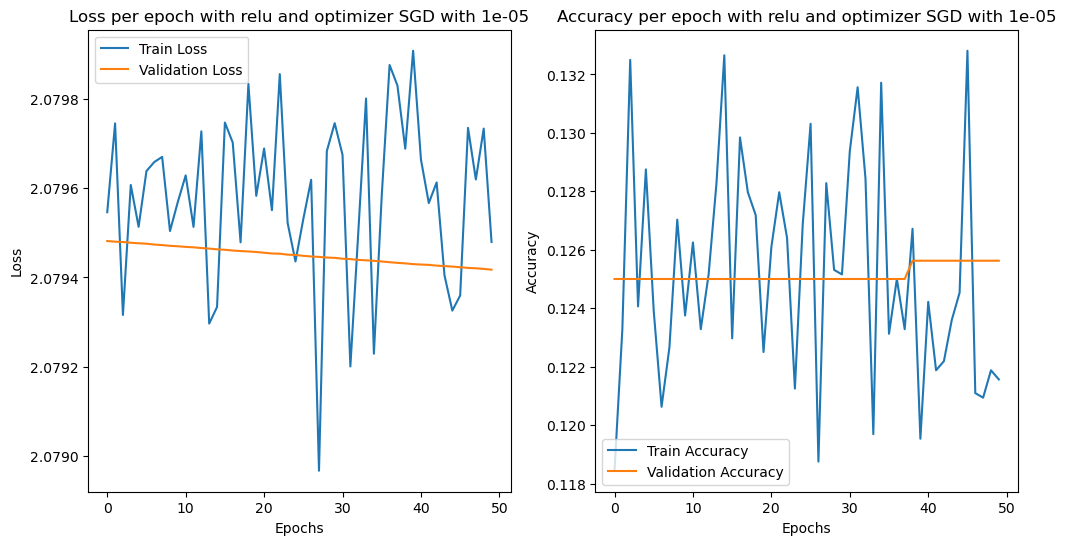

Training with sigmoid activation and optimizer SGD with 0.001
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 2.3379 - accuracy: 0.1217 - val_loss: 2.0805 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 2.3162 - accuracy: 0.1275 - val_loss: 2.0833 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 2.3145 - accuracy: 0.1305 - val_loss: 2.0979 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 31ms/step - loss: 2.3027 - accuracy: 0.1303 - val_loss: 2.0869 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 2.3127 - accuracy: 0.1273 - val_loss: 2.0839 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 2.3044 - accuracy: 0.1216 - val_loss: 2.0934 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.287

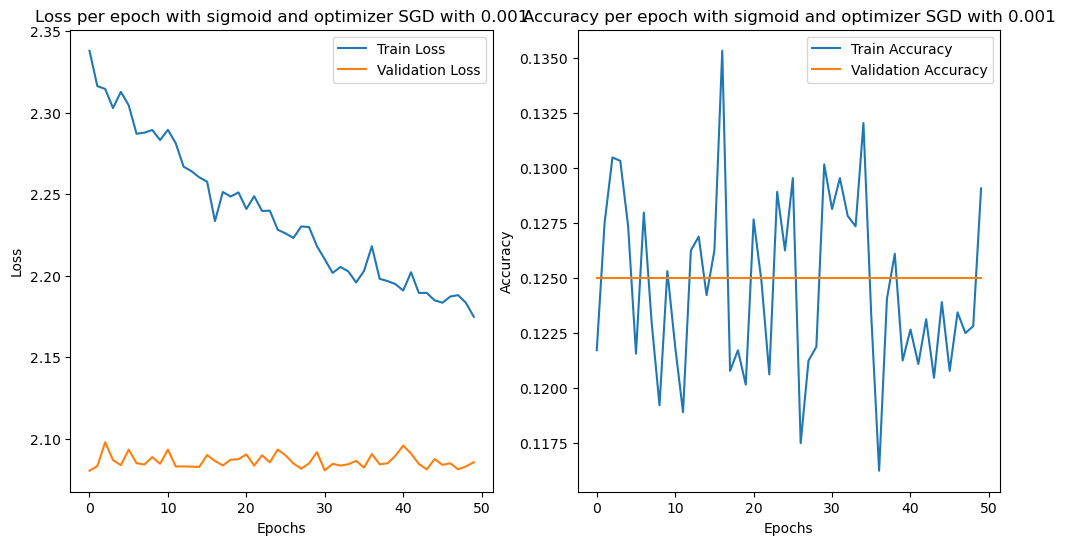

Training with sigmoid activation and optimizer SGD with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.3877 - accuracy: 0.1255 - val_loss: 2.0830 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.3147 - accuracy: 0.1250 - val_loss: 2.0799 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 27ms/step - loss: 2.3216 - accuracy: 0.1239 - val_loss: 2.0799 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 2.3227 - accuracy: 0.1214 - val_loss: 2.0801 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.3109 - accuracy: 0.1302 - val_loss: 2.0804 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 7s 35ms/step - loss: 2.3184 - accuracy: 0.1208 - val_loss: 2.0799 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.32

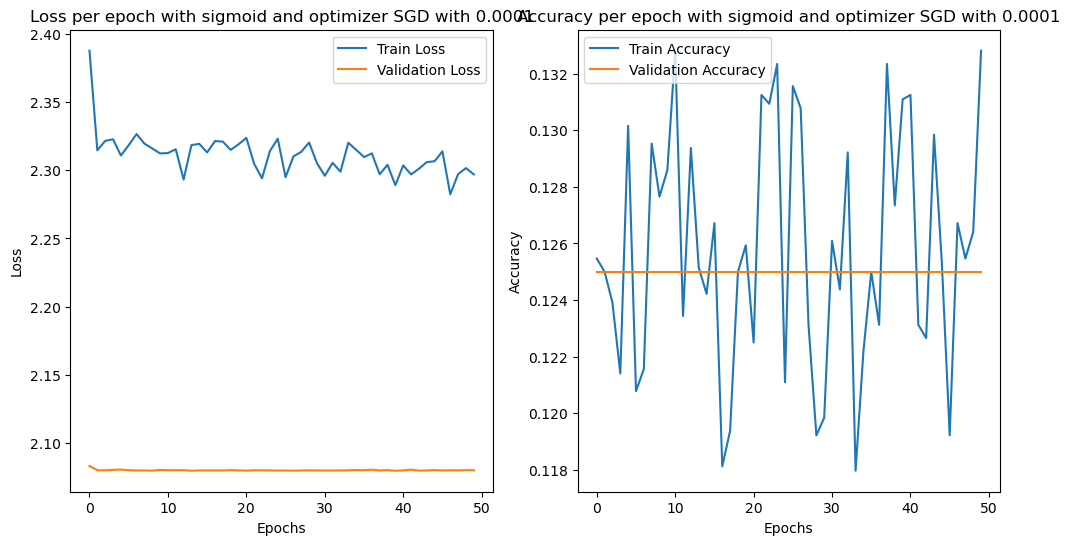

Training with sigmoid activation and optimizer SGD with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.4921 - accuracy: 0.1283 - val_loss: 2.2163 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 27ms/step - loss: 2.4240 - accuracy: 0.1256 - val_loss: 2.1656 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 24ms/step - loss: 2.3647 - accuracy: 0.1320 - val_loss: 2.1339 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 2.3504 - accuracy: 0.1267 - val_loss: 2.1138 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 2.3472 - accuracy: 0.1195 - val_loss: 2.1012 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 7s 34ms/step - loss: 2.3215 - accuracy: 0.1231 - val_loss: 2.0929 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.314

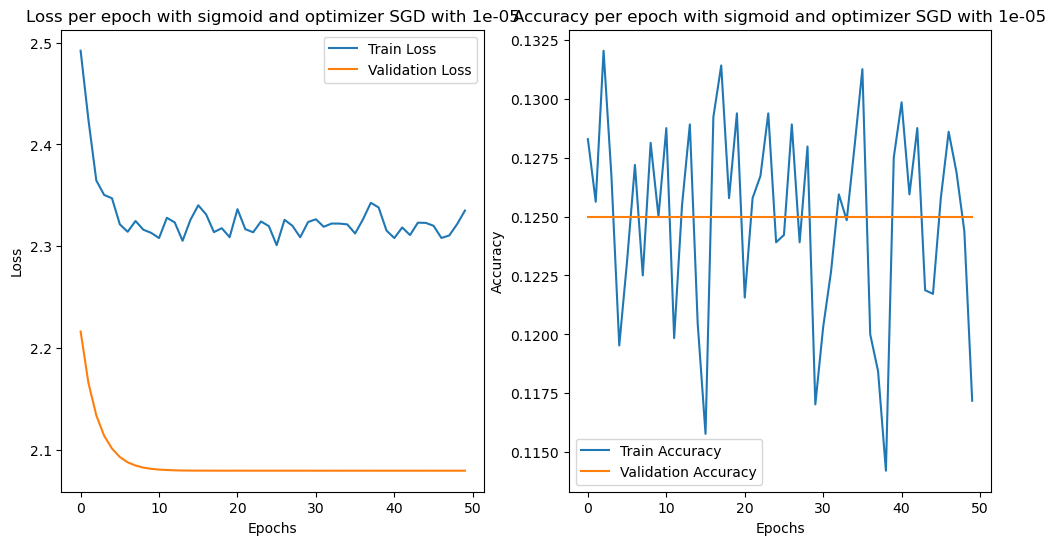

Training with tanh activation and optimizer SGD with 0.001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.0805 - accuracy: 0.1306 - val_loss: 2.0719 - val_accuracy: 0.1488
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0683 - accuracy: 0.1453 - val_loss: 2.0612 - val_accuracy: 0.1581
Epoch 3/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0593 - accuracy: 0.1620 - val_loss: 2.0480 - val_accuracy: 0.1688
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0440 - accuracy: 0.1708 - val_loss: 2.0333 - val_accuracy: 0.1819
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0257 - accuracy: 0.1891 - val_loss: 2.0170 - val_accuracy: 0.1838
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0126 - accuracy: 0.1898 - val_loss: 2.0037 - val_accuracy: 0.1925
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 1.9996 -

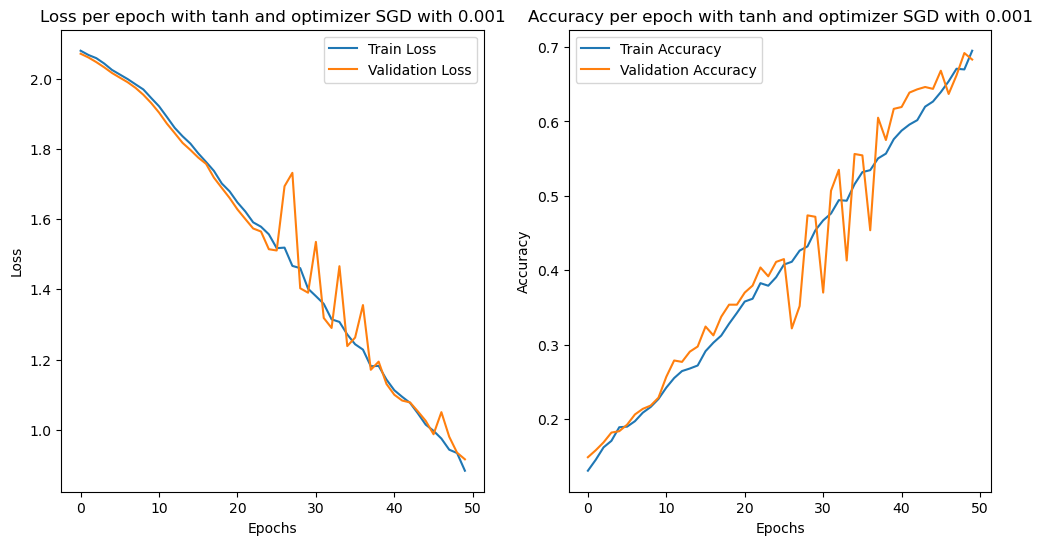

Training with tanh activation and optimizer SGD with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.0848 - accuracy: 0.1286 - val_loss: 2.0807 - val_accuracy: 0.1412
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0848 - accuracy: 0.1363 - val_loss: 2.0794 - val_accuracy: 0.1494
Epoch 3/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0841 - accuracy: 0.1241 - val_loss: 2.0782 - val_accuracy: 0.1481
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0819 - accuracy: 0.1233 - val_loss: 2.0771 - val_accuracy: 0.1450
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 2.0798 - accuracy: 0.1269 - val_loss: 2.0761 - val_accuracy: 0.1456
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0789 - accuracy: 0.1338 - val_loss: 2.0751 - val_accuracy: 0.1456
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0787 

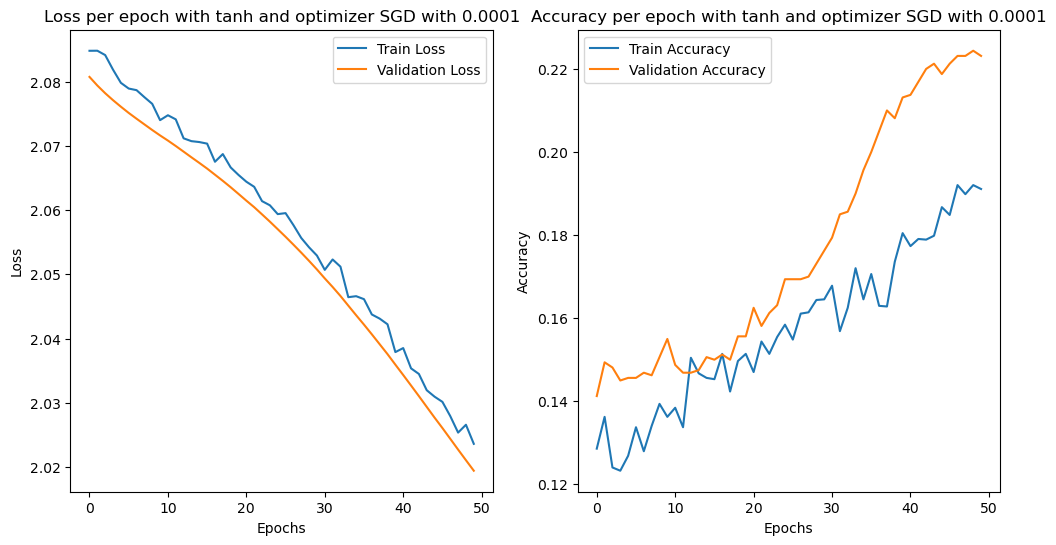

Training with tanh activation and optimizer SGD with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0836 - accuracy: 0.1225 - val_loss: 2.0786 - val_accuracy: 0.1138
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0820 - accuracy: 0.1281 - val_loss: 2.0785 - val_accuracy: 0.1150
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0851 - accuracy: 0.1136 - val_loss: 2.0784 - val_accuracy: 0.1144
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0850 - accuracy: 0.1155 - val_loss: 2.0783 - val_accuracy: 0.1156
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0847 - accuracy: 0.1233 - val_loss: 2.0783 - val_accuracy: 0.1169
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0842 - accuracy: 0.1219 - val_loss: 2.0782 - val_accuracy: 0.1175
Epoch 7/50
200/200 [==============================] - 7s 34ms/step - loss: 2.0840 -

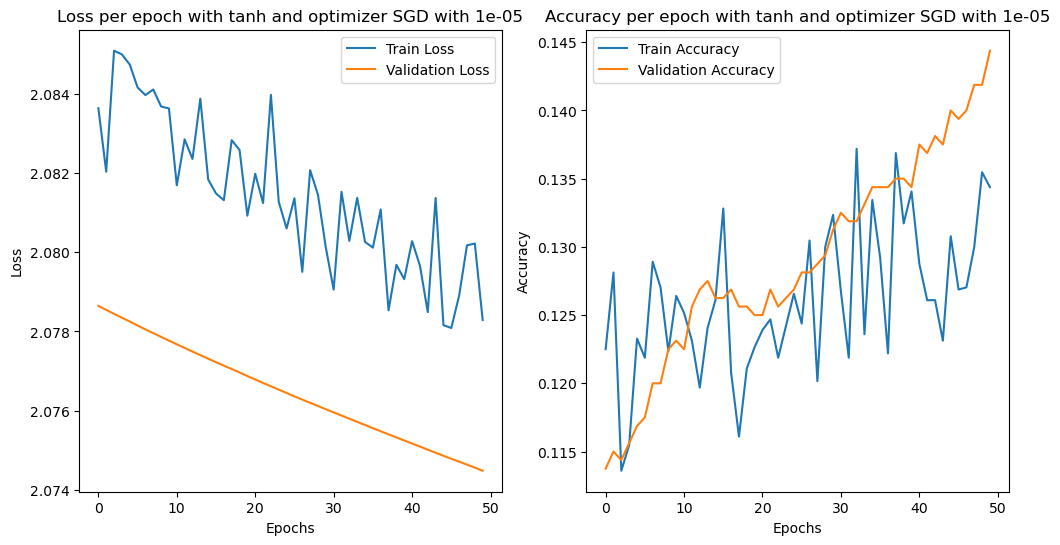

In [5]:
for activation in activations:
    for optimizer in sgds:
        initial_lr=round(float(optimizer.learning_rate),5)
        optimizer._name = 'SGD'
        print(f"Training with {activation} activation and optimizer {optimizer._name} with {initial_lr}")
        model = create_alexnet(input_shape, num_classes, activation)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


        history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

        # Plot loss and accuracy per epoch
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.show()

Training with relu activation and optimizer RMSprop with 0.001
Epoch 1/50
200/200 [==============================] - 8s 33ms/step - loss: 3.5609 - accuracy: 0.1231 - val_loss: 2.0810 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 1.8741 - accuracy: 0.2108 - val_loss: 1.4083 - val_accuracy: 0.3719
Epoch 3/50
200/200 [==============================] - 6s 31ms/step - loss: 1.1445 - accuracy: 0.5483 - val_loss: 0.7193 - val_accuracy: 0.7194
Epoch 4/50
200/200 [==============================] - 6s 29ms/step - loss: 0.6498 - accuracy: 0.7822 - val_loss: 1.1084 - val_accuracy: 0.6456
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 0.4959 - accuracy: 0.8633 - val_loss: 0.3088 - val_accuracy: 0.8963
Epoch 6/50
200/200 [==============================] - 6s 31ms/step - loss: 0.5832 - accuracy: 0.8900 - val_loss: 0.4384 - val_accuracy: 0.8506
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 0.50

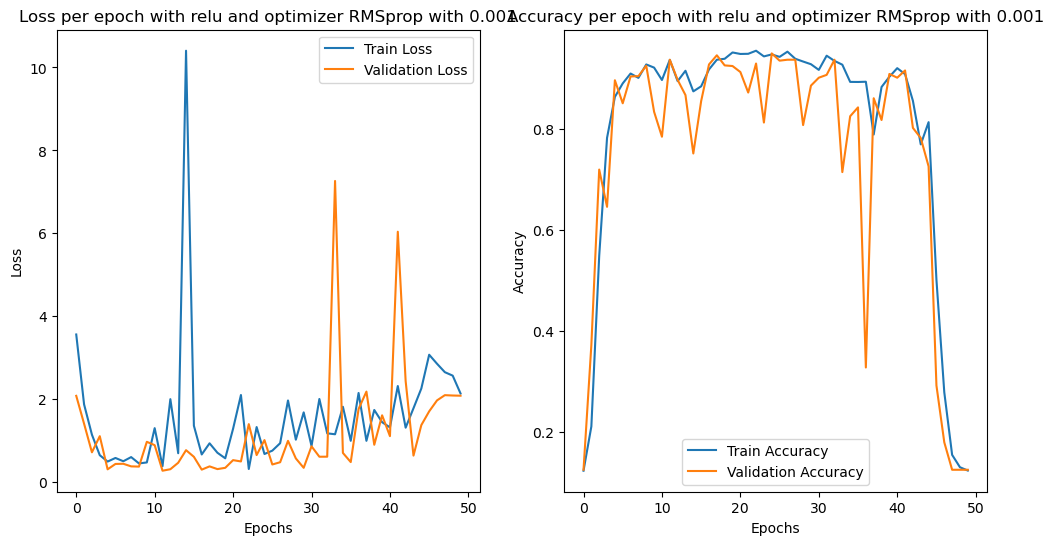

Training with relu activation and optimizer RMSprop with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 31ms/step - loss: 2.0134 - accuracy: 0.1647 - val_loss: 1.9104 - val_accuracy: 0.2044
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 1.6712 - accuracy: 0.2952 - val_loss: 1.4130 - val_accuracy: 0.3569
Epoch 3/50
200/200 [==============================] - 8s 39ms/step - loss: 1.2770 - accuracy: 0.4775 - val_loss: 0.9751 - val_accuracy: 0.6137
Epoch 4/50
200/200 [==============================] - 6s 32ms/step - loss: 0.8992 - accuracy: 0.6589 - val_loss: 0.6259 - val_accuracy: 0.7563
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 0.6123 - accuracy: 0.7803 - val_loss: 1.2360 - val_accuracy: 0.5675
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 0.4083 - accuracy: 0.8552 - val_loss: 1.1584 - val_accuracy: 0.6413
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 0.3

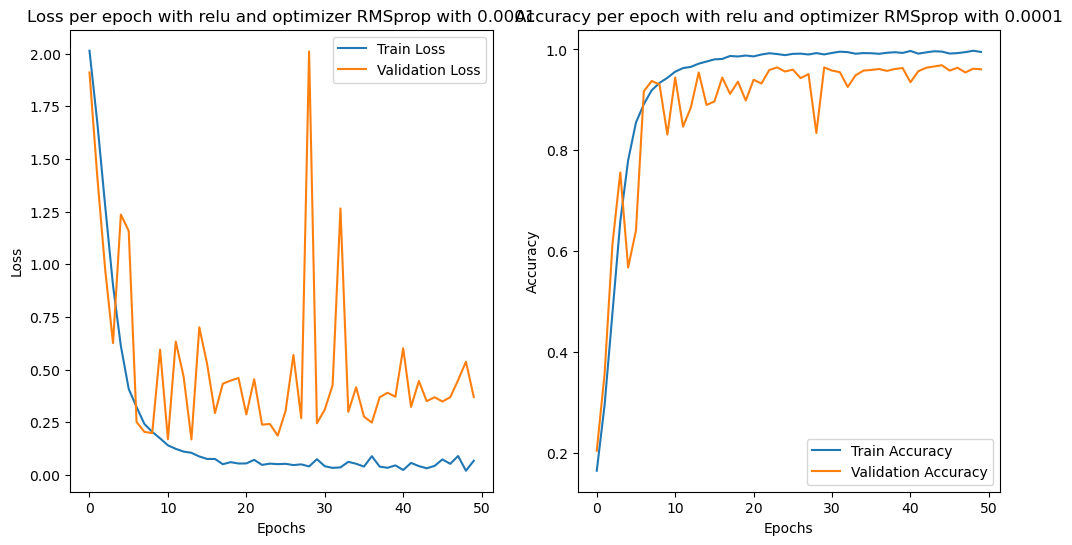

Training with relu activation and optimizer RMSprop with 1e-05
Epoch 1/50
200/200 [==============================] - 8s 33ms/step - loss: 2.0767 - accuracy: 0.1333 - val_loss: 2.0677 - val_accuracy: 0.1787
Epoch 2/50
200/200 [==============================] - 6s 32ms/step - loss: 2.0304 - accuracy: 0.1937 - val_loss: 1.9758 - val_accuracy: 0.2131
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 1.9595 - accuracy: 0.2177 - val_loss: 1.9130 - val_accuracy: 0.2338
Epoch 4/50
200/200 [==============================] - 7s 33ms/step - loss: 1.8999 - accuracy: 0.2409 - val_loss: 1.8421 - val_accuracy: 0.2537
Epoch 5/50
200/200 [==============================] - 8s 38ms/step - loss: 1.8325 - accuracy: 0.2681 - val_loss: 1.7531 - val_accuracy: 0.2981
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 1.7429 - accuracy: 0.3008 - val_loss: 1.6727 - val_accuracy: 0.3306
Epoch 7/50
200/200 [==============================] - 6s 32ms/step - loss: 1.67

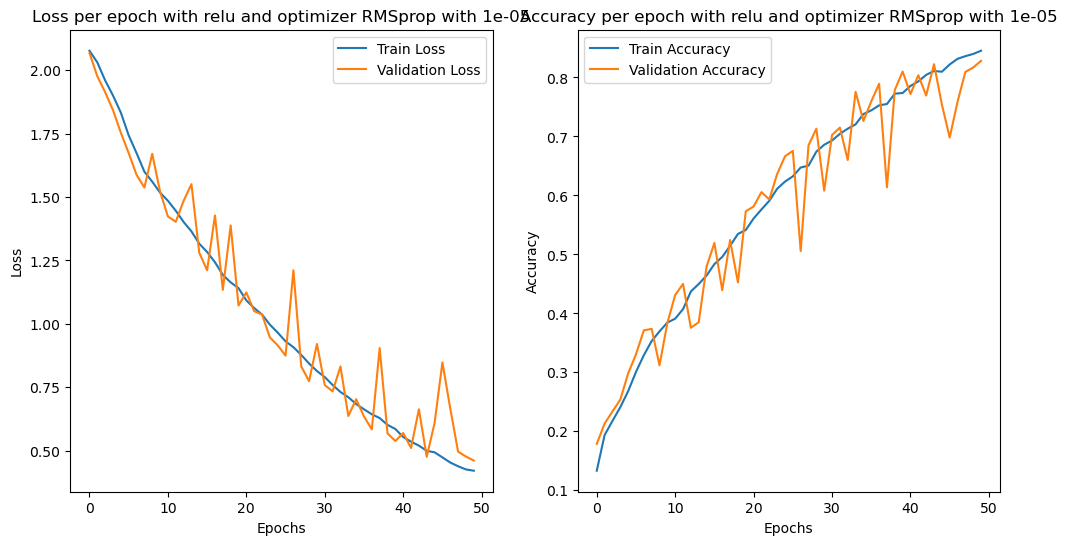

Training with sigmoid activation and optimizer RMSprop with 0.001
Epoch 1/50
200/200 [==============================] - 8s 33ms/step - loss: 2.9416 - accuracy: 0.1259 - val_loss: 2.3413 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 2.5935 - accuracy: 0.1227 - val_loss: 2.2705 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 2.5222 - accuracy: 0.1228 - val_loss: 2.3937 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 30ms/step - loss: 2.4967 - accuracy: 0.1272 - val_loss: 2.2424 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 30ms/step - loss: 2.4888 - accuracy: 0.1227 - val_loss: 2.3697 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 7s 33ms/step - loss: 2.4774 - accuracy: 0.1169 - val_loss: 2.2350 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 8s 39ms/step - loss: 2

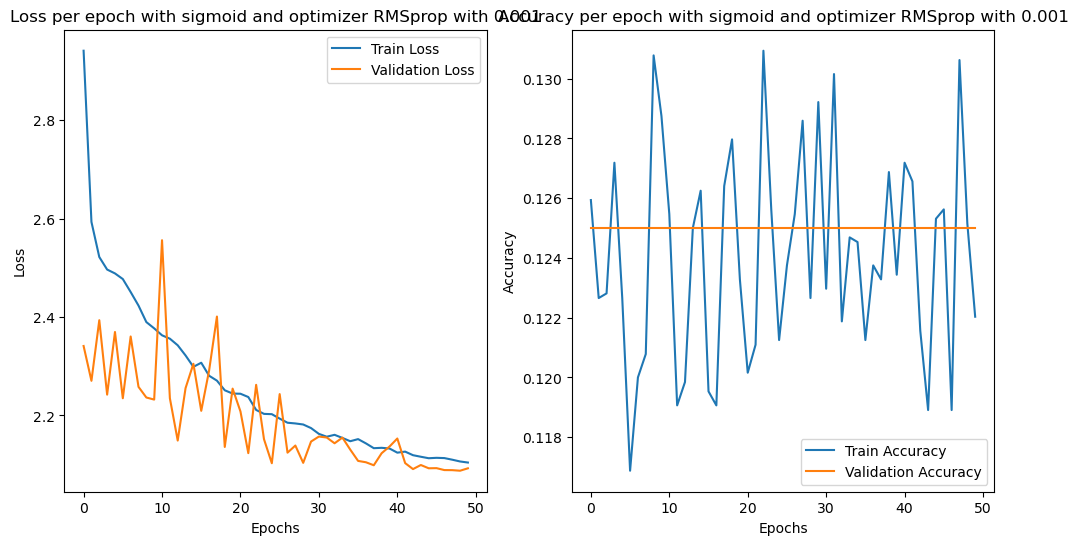

Training with sigmoid activation and optimizer RMSprop with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 31ms/step - loss: 2.4333 - accuracy: 0.1244 - val_loss: 2.1869 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 2.2801 - accuracy: 0.1261 - val_loss: 2.1355 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 2.2253 - accuracy: 0.1261 - val_loss: 2.1448 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 30ms/step - loss: 2.1849 - accuracy: 0.1300 - val_loss: 2.1174 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 30ms/step - loss: 2.1504 - accuracy: 0.1236 - val_loss: 2.0968 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 2.1294 - accuracy: 0.1250 - val_loss: 2.1212 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 

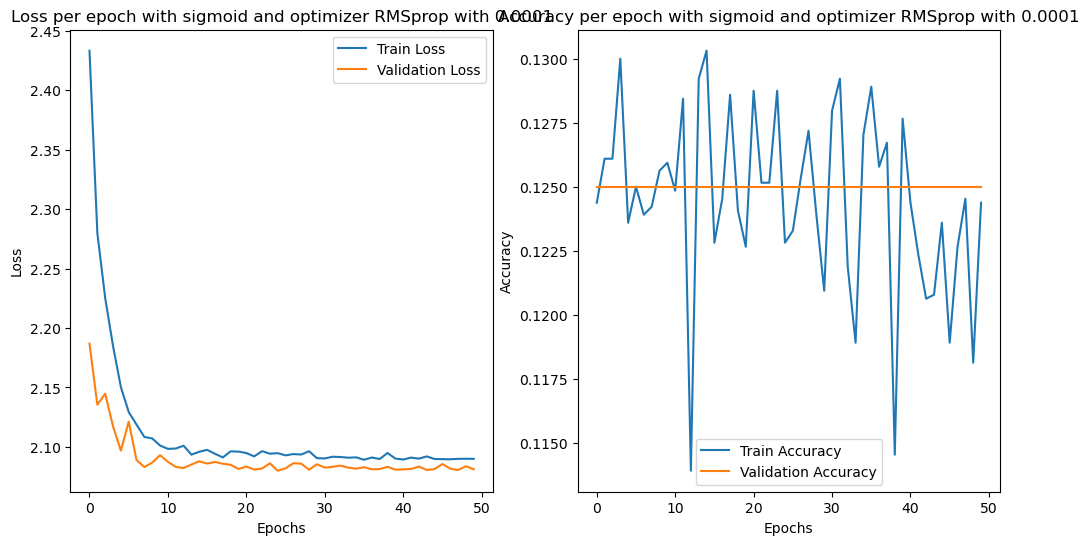

Training with sigmoid activation and optimizer RMSprop with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 31ms/step - loss: 2.3267 - accuracy: 0.1230 - val_loss: 2.0940 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 2.2990 - accuracy: 0.1228 - val_loss: 2.0859 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 2.2775 - accuracy: 0.1208 - val_loss: 2.0831 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 31ms/step - loss: 2.2634 - accuracy: 0.1178 - val_loss: 2.0886 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 30ms/step - loss: 2.2327 - accuracy: 0.1259 - val_loss: 2.0849 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 30ms/step - loss: 2.2331 - accuracy: 0.1197 - val_loss: 2.0917 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 2

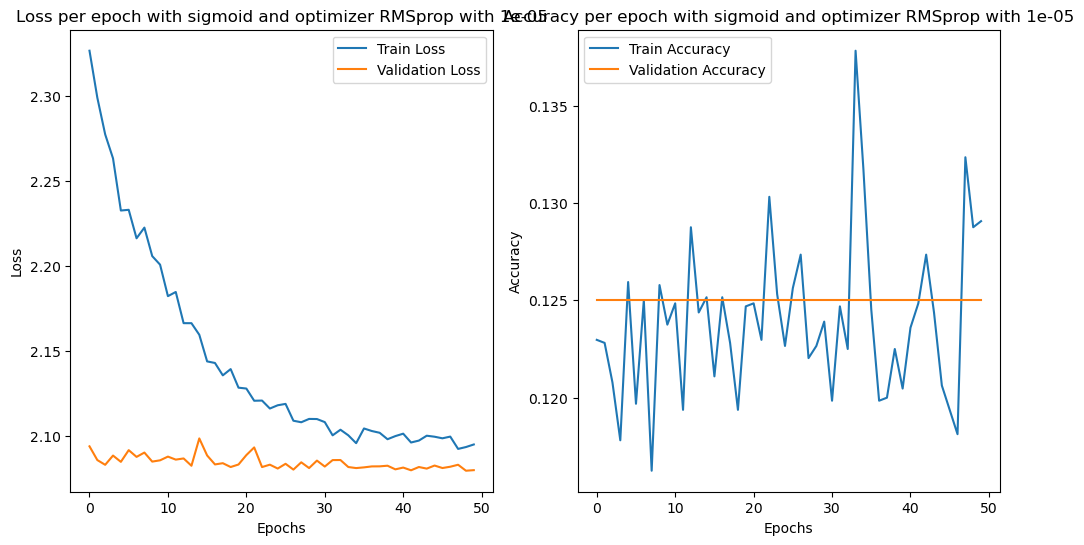

Training with tanh activation and optimizer RMSprop with 0.001
Epoch 1/50
200/200 [==============================] - 8s 34ms/step - loss: 5.0648 - accuracy: 0.1275 - val_loss: 4.4920 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 4.3760 - accuracy: 0.1270 - val_loss: 2.9410 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 4.2707 - accuracy: 0.1247 - val_loss: 4.2689 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 29ms/step - loss: 4.3017 - accuracy: 0.1172 - val_loss: 4.6557 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 30ms/step - loss: 4.3126 - accuracy: 0.1219 - val_loss: 3.9401 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 7s 33ms/step - loss: 4.2177 - accuracy: 0.1275 - val_loss: 3.8860 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 4.27

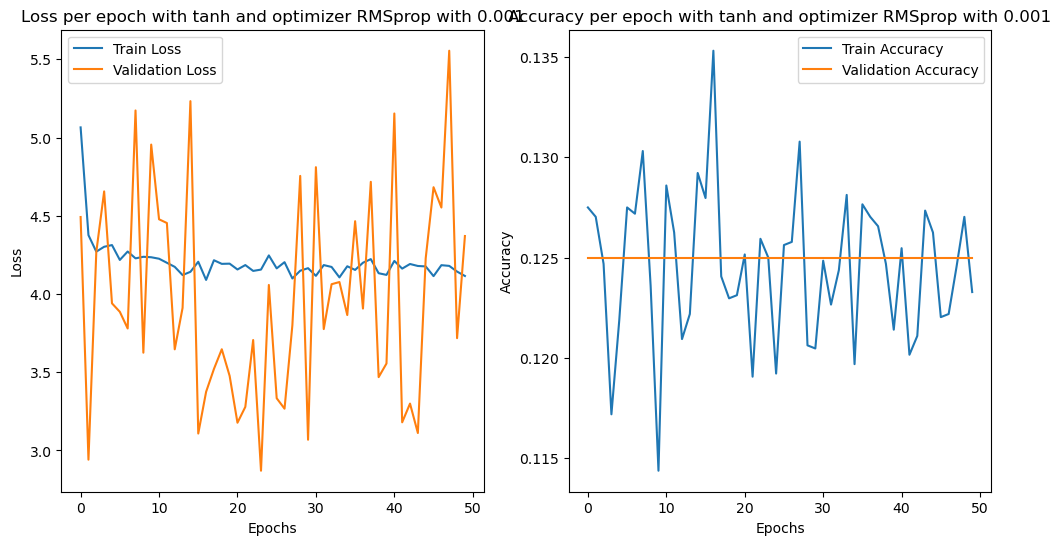

Training with tanh activation and optimizer RMSprop with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 1.9177 - accuracy: 0.2320 - val_loss: 1.5304 - val_accuracy: 0.4013
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 1.1186 - accuracy: 0.5720 - val_loss: 0.7005 - val_accuracy: 0.7525
Epoch 3/50
200/200 [==============================] - 7s 33ms/step - loss: 0.5476 - accuracy: 0.8067 - val_loss: 0.5570 - val_accuracy: 0.7987
Epoch 4/50
200/200 [==============================] - 8s 42ms/step - loss: 0.3380 - accuracy: 0.8883 - val_loss: 0.4027 - val_accuracy: 0.8575
Epoch 5/50
200/200 [==============================] - 6s 32ms/step - loss: 0.2166 - accuracy: 0.9281 - val_loss: 0.3596 - val_accuracy: 0.8894
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 0.1492 - accuracy: 0.9528 - val_loss: 0.3848 - val_accuracy: 0.8856
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 0.1

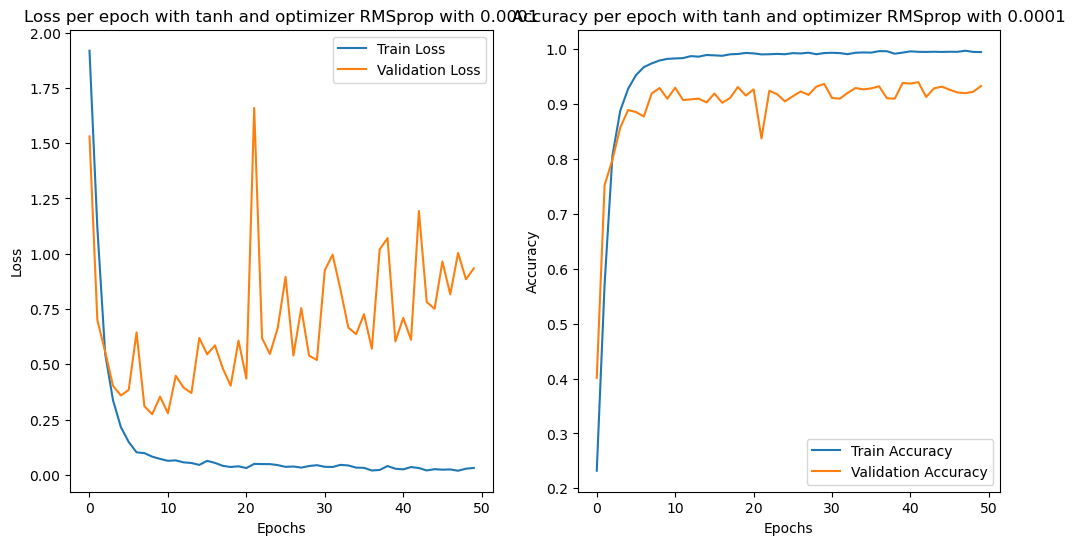

Training with tanh activation and optimizer RMSprop with 1e-05
Epoch 1/50
200/200 [==============================] - 8s 33ms/step - loss: 2.0225 - accuracy: 0.1887 - val_loss: 1.9733 - val_accuracy: 0.2362
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 1.9273 - accuracy: 0.2422 - val_loss: 1.8834 - val_accuracy: 0.2438
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 1.8078 - accuracy: 0.2953 - val_loss: 1.7380 - val_accuracy: 0.3469
Epoch 4/50
200/200 [==============================] - 6s 30ms/step - loss: 1.6669 - accuracy: 0.3438 - val_loss: 1.6086 - val_accuracy: 0.3656
Epoch 5/50
200/200 [==============================] - 6s 30ms/step - loss: 1.5624 - accuracy: 0.3875 - val_loss: 1.5319 - val_accuracy: 0.4025
Epoch 6/50
200/200 [==============================] - 6s 32ms/step - loss: 1.4661 - accuracy: 0.4330 - val_loss: 1.4437 - val_accuracy: 0.4412
Epoch 7/50
200/200 [==============================] - 7s 35ms/step - loss: 1.39

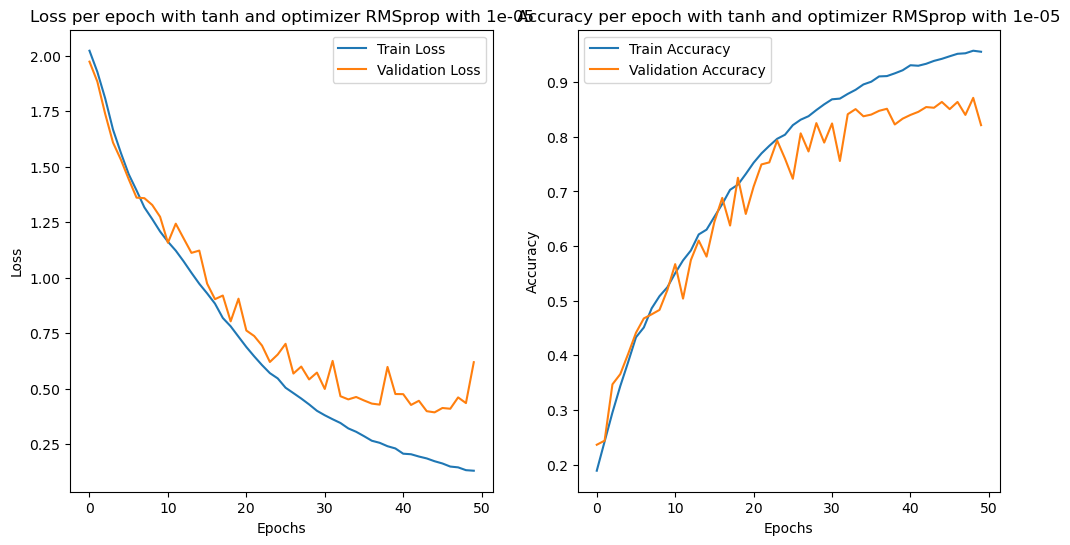

In [6]:
for activation in activations:
    for optimizer in rmsprops:
        initial_lr=round(float(optimizer.learning_rate),5)
        optimizer._name = 'RMSprop'
        print(f"Training with {activation} activation and optimizer {optimizer._name} with {initial_lr}")
        model = create_alexnet(input_shape, num_classes, activation)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


        history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

        # Plot loss and accuracy per epoch
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.show()

* input_shape: a tuple that specifies the shape of the input images to the network
* num_classes: an integer that specifies the number of classes to classify
* activation: a string that specifies the activation function to use in the network
* fc_nodes_ratio: a float that specifies the ratio of fully connected layer nodes relative to the original number
* layers_to_remove: a list of integers that specifies which layers to remove from the original AlexNet architecture

Training with relu activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 7s 27ms/step - loss: 3.6275 - accuracy: 0.1283 - val_loss: 2.0806 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0815 - accuracy: 0.1195 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0803 - accuracy: 0.1236 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 2.0808 - accuracy: 0.1194 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0802 - accuracy: 0.1294 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0798 - accuracy: 0.1258 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0805 

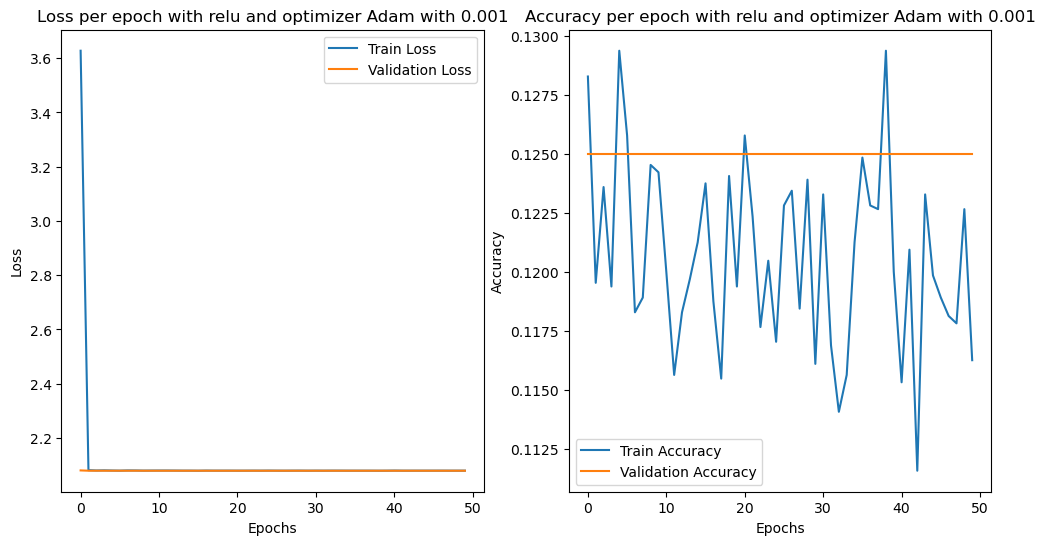

Training with relu activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 9s 39ms/step - loss: 2.0640 - accuracy: 0.1372 - val_loss: 1.9809 - val_accuracy: 0.1994
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 1.6531 - accuracy: 0.3013 - val_loss: 1.4617 - val_accuracy: 0.3700
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 1.1660 - accuracy: 0.4917 - val_loss: 0.9671 - val_accuracy: 0.6025
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 0.6828 - accuracy: 0.7366 - val_loss: 0.5705 - val_accuracy: 0.7887
Epoch 5/50
200/200 [==============================] - 6s 27ms/step - loss: 0.4180 - accuracy: 0.8464 - val_loss: 0.3668 - val_accuracy: 0.8662
Epoch 6/50
200/200 [==============================] - 5s 24ms/step - loss: 0.3001 - accuracy: 0.8858 - val_loss: 0.3151 - val_accuracy: 0.8919
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 0.2085

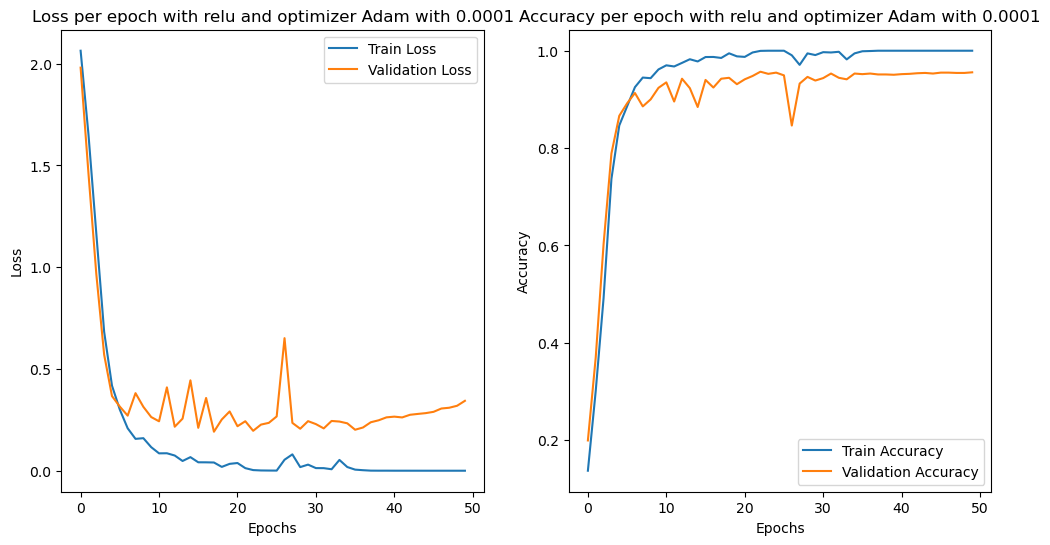

Training with relu activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 34ms/step - loss: 2.0386 - accuracy: 0.1577 - val_loss: 1.9556 - val_accuracy: 0.2081
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 1.8601 - accuracy: 0.2281 - val_loss: 1.7070 - val_accuracy: 0.3175
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 1.6316 - accuracy: 0.3266 - val_loss: 1.5127 - val_accuracy: 0.3825
Epoch 4/50
200/200 [==============================] - 5s 25ms/step - loss: 1.4794 - accuracy: 0.3878 - val_loss: 1.4132 - val_accuracy: 0.4181
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 1.3729 - accuracy: 0.4295 - val_loss: 1.3364 - val_accuracy: 0.4731
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 1.2727 - accuracy: 0.4752 - val_loss: 1.2417 - val_accuracy: 0.5113
Epoch 7/50
200/200 [==============================] - 5s 24ms/step - loss: 1.2046 

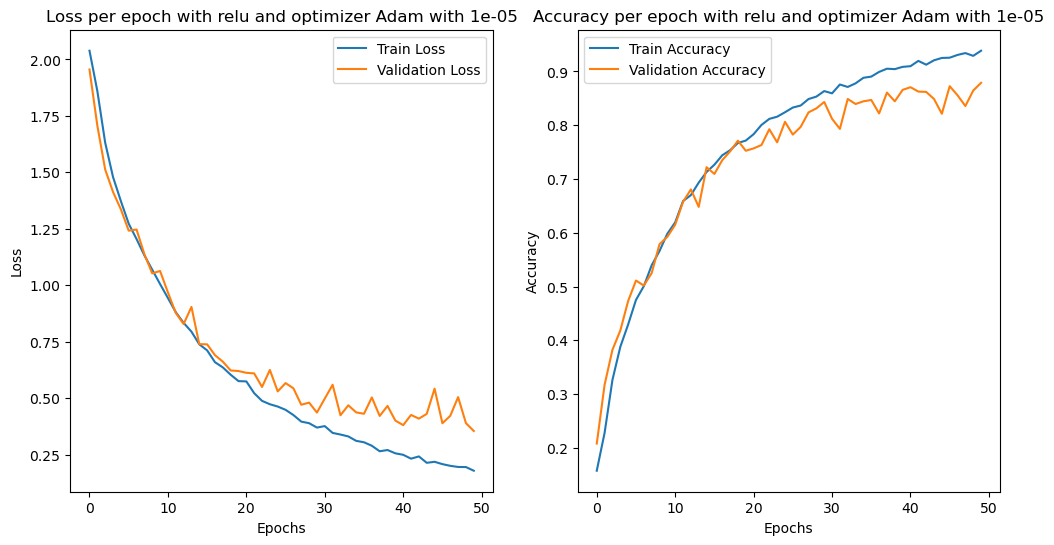

Training with sigmoid activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 3.3867 - accuracy: 0.1228 - val_loss: 2.0797 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0810 - accuracy: 0.1239 - val_loss: 2.0799 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 7s 37ms/step - loss: 2.0806 - accuracy: 0.1220 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0798 - accuracy: 0.1269 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0801 - accuracy: 0.1169 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0804 - accuracy: 0.1177 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 24ms/step - loss: 2.08

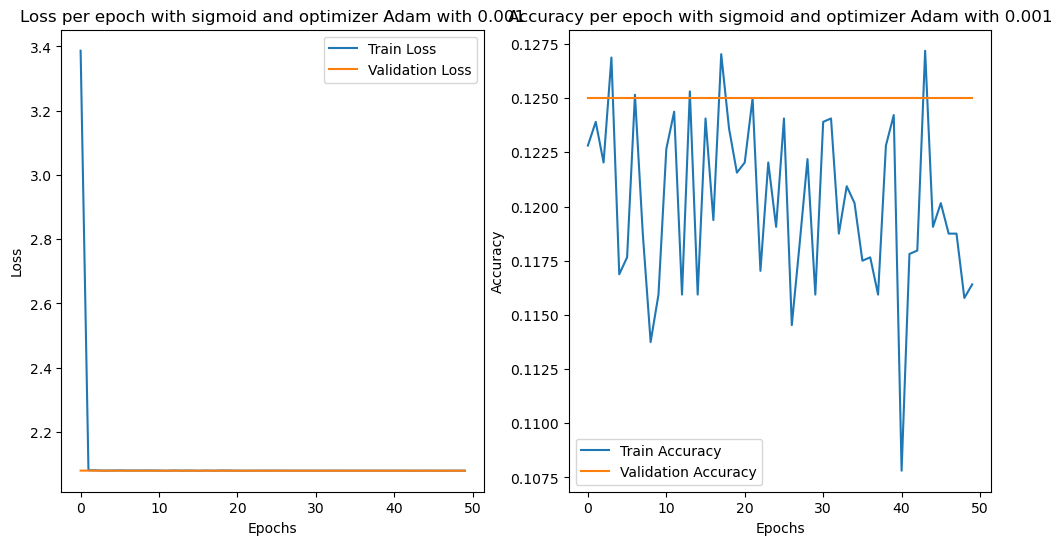

Training with sigmoid activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.0816 - accuracy: 0.1122 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0800 - accuracy: 0.1213 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0799 - accuracy: 0.1175 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 32ms/step - loss: 2.0798 - accuracy: 0.1197 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 8s 38ms/step - loss: 2.0798 - accuracy: 0.1186 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 30ms/step - loss: 2.0796 - accuracy: 0.1231 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0

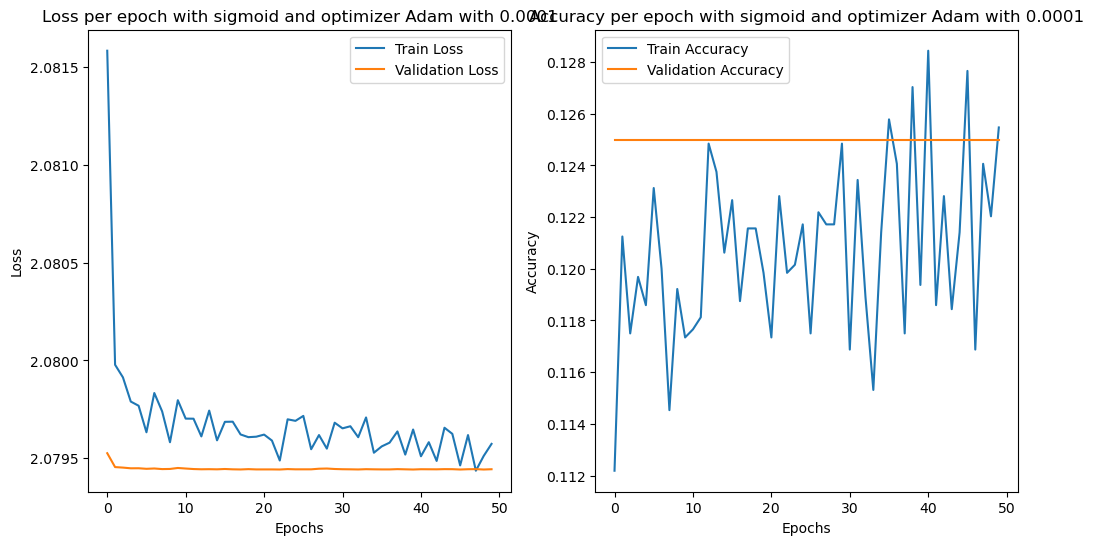

Training with sigmoid activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 25ms/step - loss: 2.0432 - accuracy: 0.1569 - val_loss: 1.9551 - val_accuracy: 0.1900
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 1.8821 - accuracy: 0.2102 - val_loss: 1.7646 - val_accuracy: 0.2344
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 1.6750 - accuracy: 0.3091 - val_loss: 1.6495 - val_accuracy: 0.3119
Epoch 4/50
200/200 [==============================] - 7s 36ms/step - loss: 1.5257 - accuracy: 0.3688 - val_loss: 1.4362 - val_accuracy: 0.4225
Epoch 5/50
200/200 [==============================] - 7s 35ms/step - loss: 1.3864 - accuracy: 0.4348 - val_loss: 1.3672 - val_accuracy: 0.4425
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 1.3097 - accuracy: 0.4623 - val_loss: 1.3102 - val_accuracy: 0.4781
Epoch 7/50
200/200 [==============================] - 5s 27ms/step - loss: 1.19

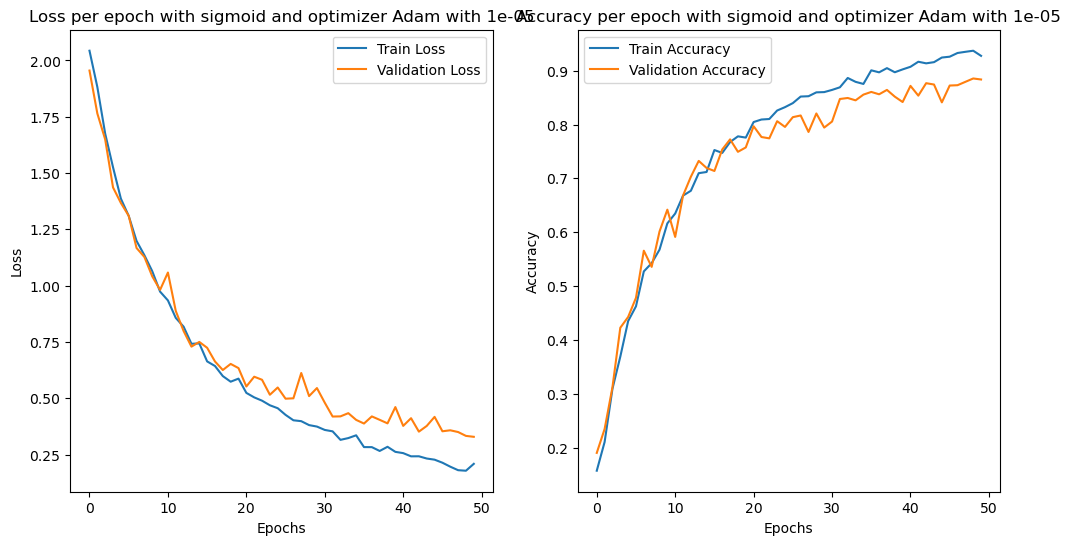

Training with tanh activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 4.4644 - accuracy: 0.1284 - val_loss: 2.0800 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0810 - accuracy: 0.1213 - val_loss: 2.0797 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0804 - accuracy: 0.1169 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0796 - accuracy: 0.1286 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 8s 37ms/step - loss: 2.0801 - accuracy: 0.1181 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0802 - accuracy: 0.1189 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0798 

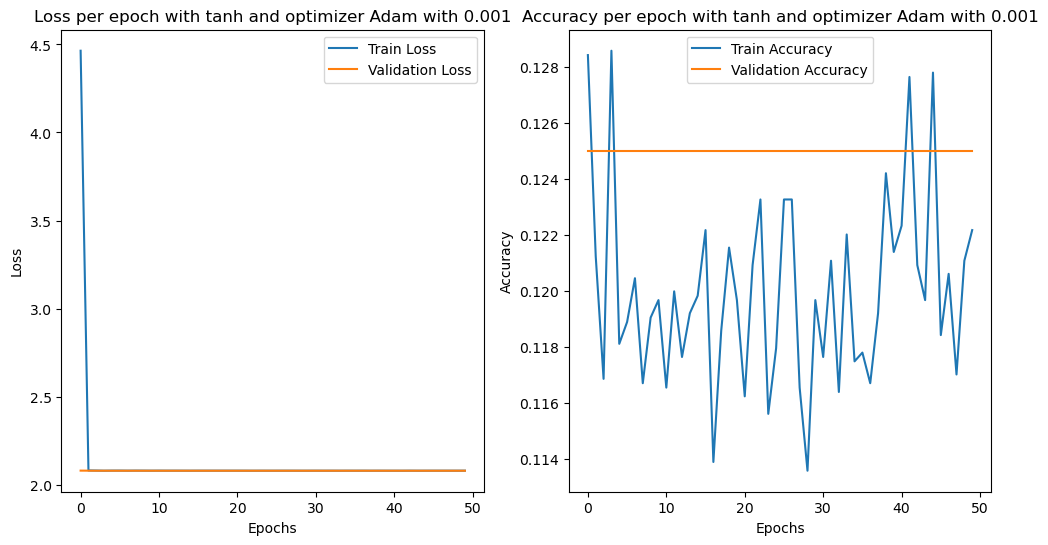

Training with tanh activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0815 - accuracy: 0.1158 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 2.0799 - accuracy: 0.1172 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 2.0798 - accuracy: 0.1250 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 30ms/step - loss: 2.0798 - accuracy: 0.1245 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0797 - accuracy: 0.1202 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 2.0798 - accuracy: 0.1150 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0797

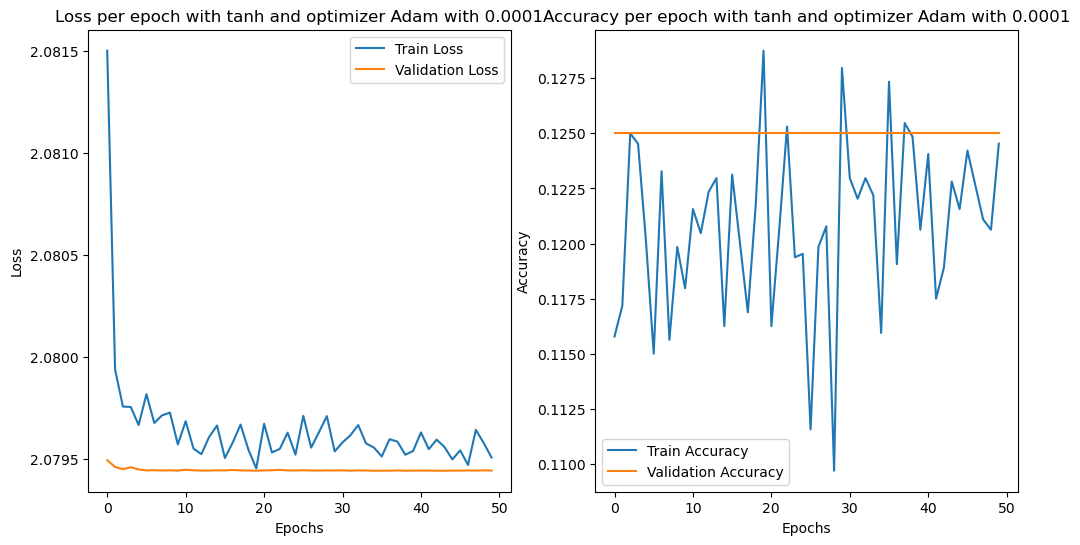

Training with tanh activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 26ms/step - loss: 2.0380 - accuracy: 0.1462 - val_loss: 1.9287 - val_accuracy: 0.2025
Epoch 2/50
200/200 [==============================] - 5s 25ms/step - loss: 1.8247 - accuracy: 0.2375 - val_loss: 1.6857 - val_accuracy: 0.3094
Epoch 3/50
200/200 [==============================] - 7s 33ms/step - loss: 1.6060 - accuracy: 0.3361 - val_loss: 1.5096 - val_accuracy: 0.3881
Epoch 4/50
200/200 [==============================] - 7s 33ms/step - loss: 1.4837 - accuracy: 0.3872 - val_loss: 1.5634 - val_accuracy: 0.3175
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 1.3753 - accuracy: 0.4245 - val_loss: 1.3188 - val_accuracy: 0.4706
Epoch 6/50
200/200 [==============================] - 5s 24ms/step - loss: 1.2832 - accuracy: 0.4669 - val_loss: 1.2523 - val_accuracy: 0.4719
Epoch 7/50
200/200 [==============================] - 5s 24ms/step - loss: 1.2070 

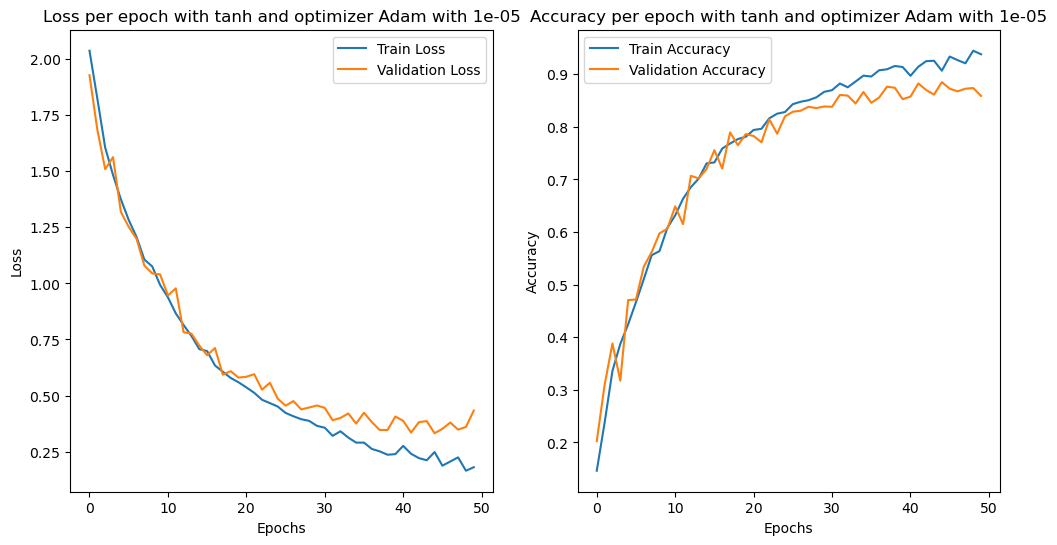

Training with relu activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 4.9890 - accuracy: 0.1336 - val_loss: 2.0800 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 32ms/step - loss: 2.0814 - accuracy: 0.1192 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 7s 37ms/step - loss: 2.0810 - accuracy: 0.1242 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 27ms/step - loss: 2.0803 - accuracy: 0.1181 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0802 - accuracy: 0.1233 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0804 - accuracy: 0.1172 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 27ms/step - loss: 2.0801 

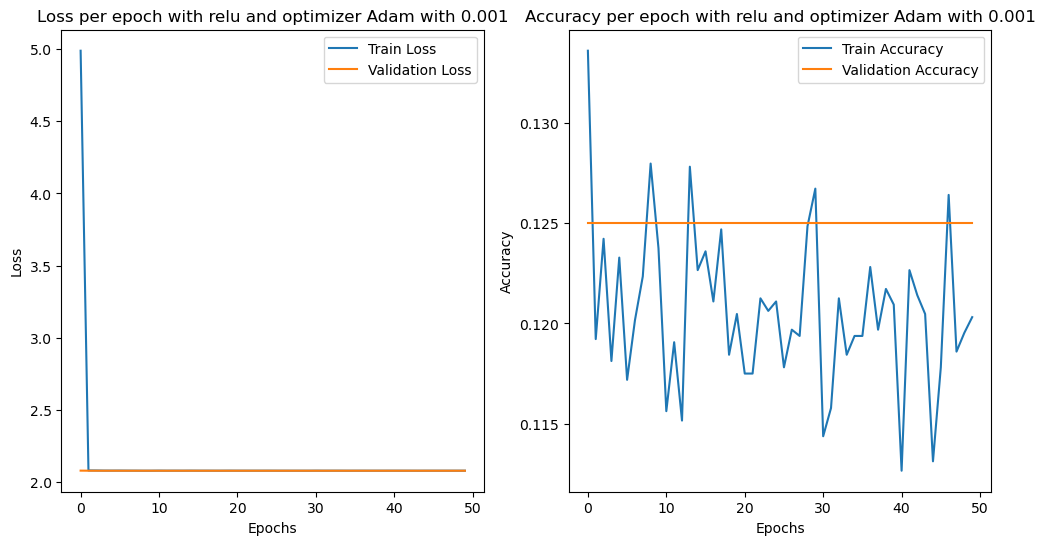

Training with relu activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 2.0834 - accuracy: 0.1231 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 24ms/step - loss: 1.9630 - accuracy: 0.1797 - val_loss: 1.6636 - val_accuracy: 0.2781
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 1.3362 - accuracy: 0.4417 - val_loss: 0.9110 - val_accuracy: 0.6488
Epoch 4/50
200/200 [==============================] - 7s 34ms/step - loss: 0.6561 - accuracy: 0.7511 - val_loss: 0.4960 - val_accuracy: 0.8138
Epoch 5/50
200/200 [==============================] - 5s 26ms/step - loss: 0.3783 - accuracy: 0.8645 - val_loss: 0.3707 - val_accuracy: 0.8687
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 0.2514 - accuracy: 0.9141 - val_loss: 0.2635 - val_accuracy: 0.9094
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 0.1741

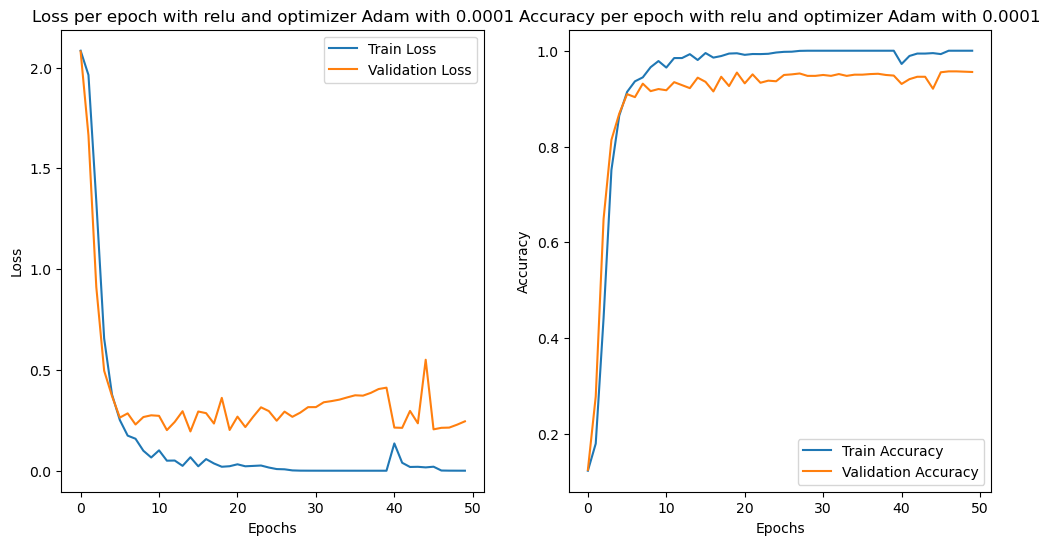

Training with relu activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0274 - accuracy: 0.1631 - val_loss: 1.9331 - val_accuracy: 0.2069
Epoch 2/50
200/200 [==============================] - 8s 38ms/step - loss: 1.8286 - accuracy: 0.2398 - val_loss: 1.8198 - val_accuracy: 0.2875
Epoch 3/50
200/200 [==============================] - 5s 27ms/step - loss: 1.6107 - accuracy: 0.3453 - val_loss: 1.5090 - val_accuracy: 0.3900
Epoch 4/50
200/200 [==============================] - 6s 27ms/step - loss: 1.4501 - accuracy: 0.3936 - val_loss: 1.6052 - val_accuracy: 0.3375
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 1.3520 - accuracy: 0.4339 - val_loss: 1.2991 - val_accuracy: 0.4750
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 1.2660 - accuracy: 0.4739 - val_loss: 1.4750 - val_accuracy: 0.3688
Epoch 7/50
200/200 [==============================] - 6s 27ms/step - loss: 1.1986 

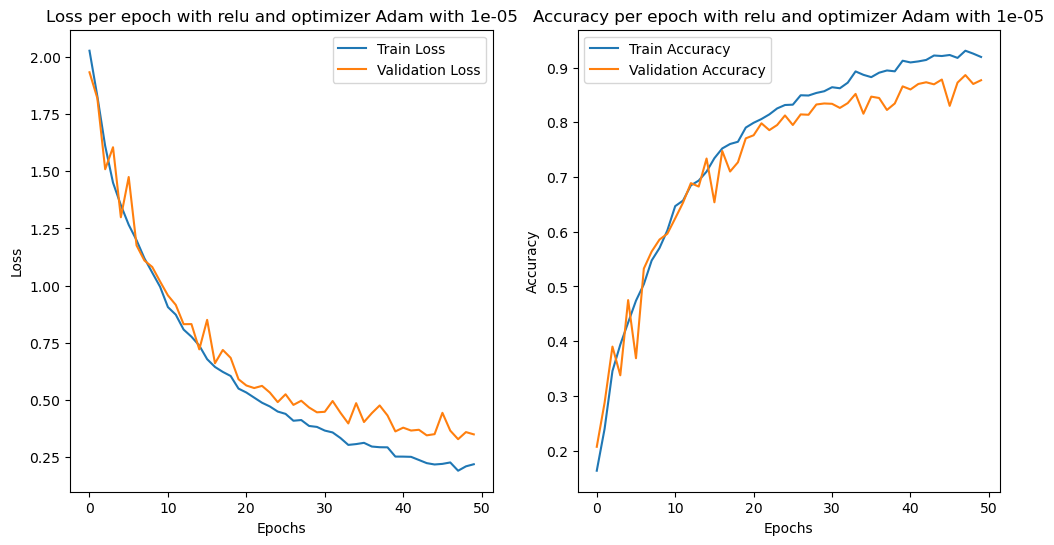

Training with sigmoid activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 3.3152 - accuracy: 0.1186 - val_loss: 2.0800 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0812 - accuracy: 0.1231 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 5s 25ms/step - loss: 2.0807 - accuracy: 0.1208 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0805 - accuracy: 0.1119 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0804 - accuracy: 0.1181 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0802 - accuracy: 0.1189 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 5s 25ms/step - loss: 2.07

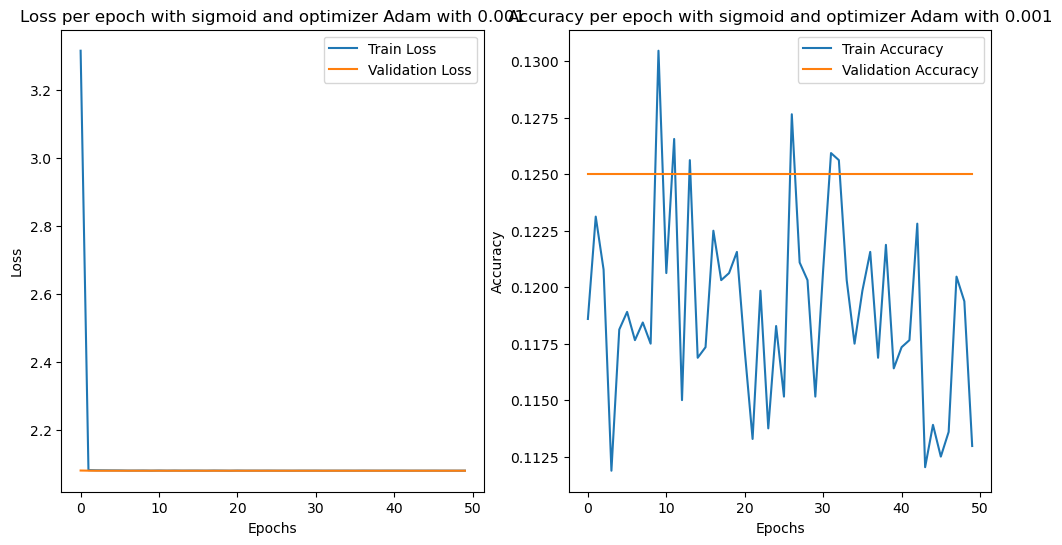

Training with sigmoid activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 29ms/step - loss: 2.0617 - accuracy: 0.1353 - val_loss: 1.9343 - val_accuracy: 0.1981
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 1.4935 - accuracy: 0.3677 - val_loss: 1.0442 - val_accuracy: 0.6050
Epoch 3/50
200/200 [==============================] - 6s 29ms/step - loss: 0.7863 - accuracy: 0.7030 - val_loss: 0.5571 - val_accuracy: 0.8019
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 0.4261 - accuracy: 0.8452 - val_loss: 0.3419 - val_accuracy: 0.8756
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 0.2871 - accuracy: 0.9000 - val_loss: 0.2864 - val_accuracy: 0.8969
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 0.1841 - accuracy: 0.9373 - val_loss: 0.2388 - val_accuracy: 0.9169
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 0.1

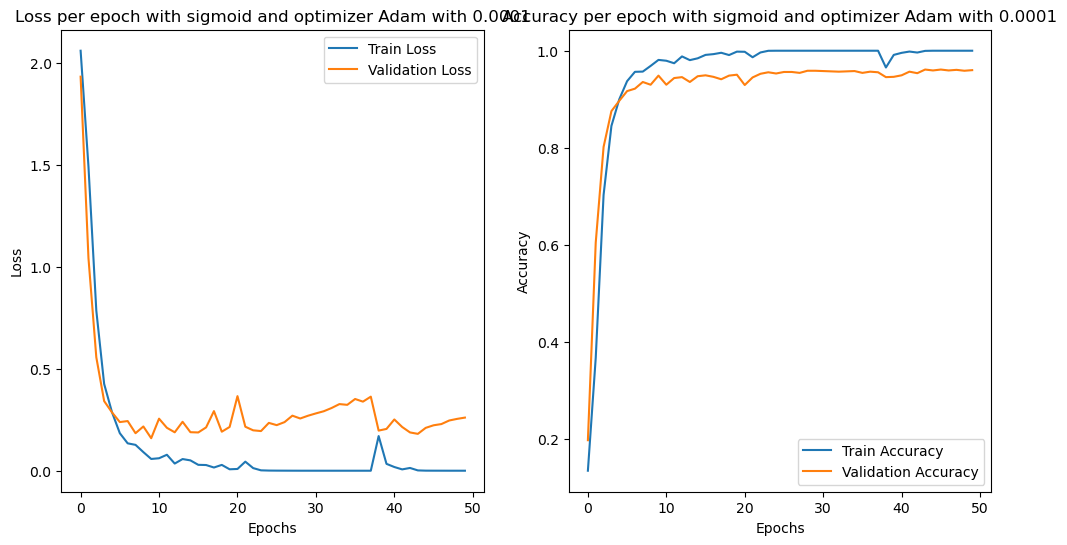

Training with sigmoid activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0311 - accuracy: 0.1614 - val_loss: 1.9455 - val_accuracy: 0.2294
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 1.8017 - accuracy: 0.2591 - val_loss: 1.6130 - val_accuracy: 0.3356
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 1.5372 - accuracy: 0.3752 - val_loss: 1.5250 - val_accuracy: 0.3500
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 1.3907 - accuracy: 0.4303 - val_loss: 1.3339 - val_accuracy: 0.5119
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 1.2653 - accuracy: 0.4902 - val_loss: 1.2458 - val_accuracy: 0.5150
Epoch 6/50
200/200 [==============================] - 6s 31ms/step - loss: 1.1600 - accuracy: 0.5427 - val_loss: 1.1574 - val_accuracy: 0.5556
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 1.04

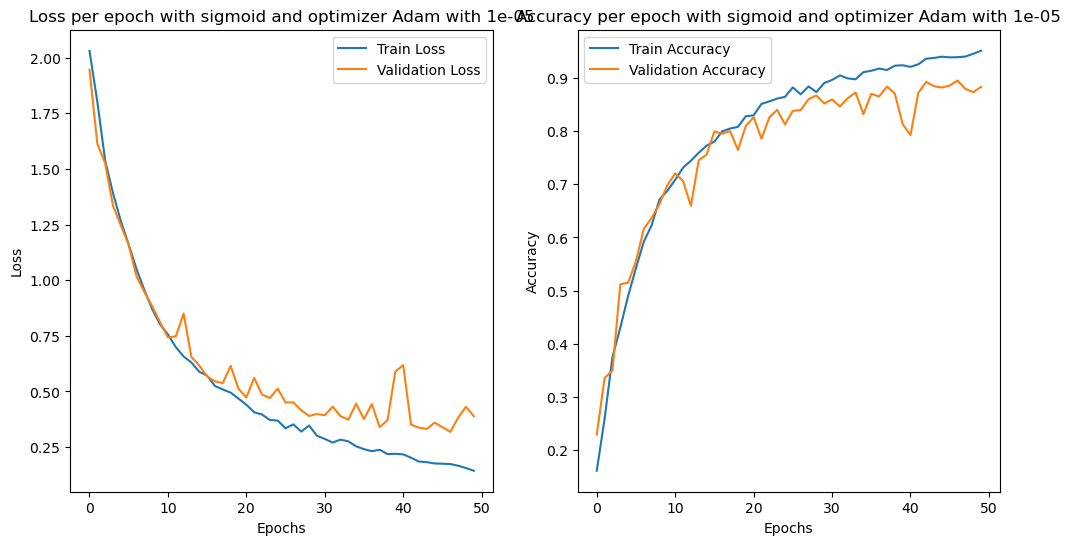

Training with tanh activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 7s 32ms/step - loss: 3.2638 - accuracy: 0.1200 - val_loss: 2.0797 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0809 - accuracy: 0.1180 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0806 - accuracy: 0.1192 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 7s 33ms/step - loss: 2.0802 - accuracy: 0.1184 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 8s 42ms/step - loss: 2.0803 - accuracy: 0.1231 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 7s 35ms/step - loss: 2.0804 - accuracy: 0.1163 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0804 

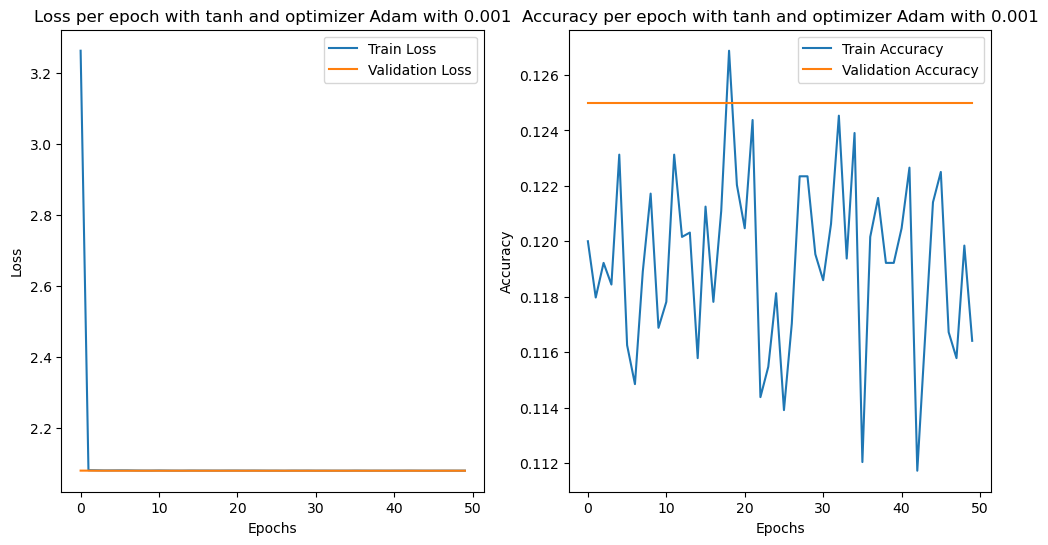

Training with tanh activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 31ms/step - loss: 2.0816 - accuracy: 0.1208 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 1.8797 - accuracy: 0.2116 - val_loss: 1.5114 - val_accuracy: 0.3475
Epoch 3/50
200/200 [==============================] - 6s 29ms/step - loss: 1.0729 - accuracy: 0.5836 - val_loss: 0.6985 - val_accuracy: 0.7325
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 0.4990 - accuracy: 0.8230 - val_loss: 0.3706 - val_accuracy: 0.8712
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 0.3173 - accuracy: 0.8913 - val_loss: 0.4495 - val_accuracy: 0.8525
Epoch 6/50
200/200 [==============================] - 6s 31ms/step - loss: 0.2013 - accuracy: 0.9309 - val_loss: 0.2428 - val_accuracy: 0.9212
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 0.1399

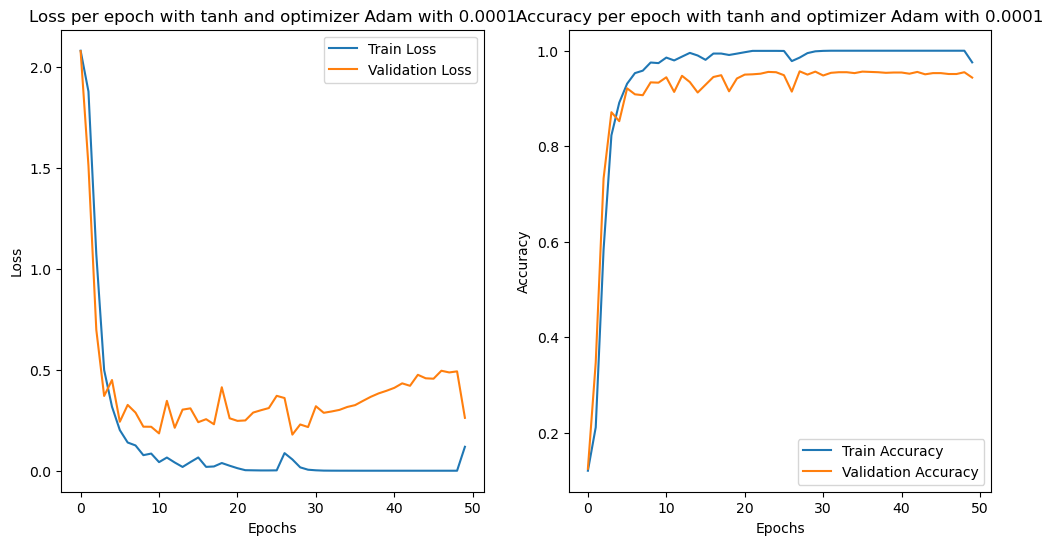

Training with tanh activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0280 - accuracy: 0.1598 - val_loss: 1.8999 - val_accuracy: 0.2169
Epoch 2/50
200/200 [==============================] - 6s 31ms/step - loss: 1.7747 - accuracy: 0.2488 - val_loss: 1.6978 - val_accuracy: 0.3119
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 1.5754 - accuracy: 0.3514 - val_loss: 1.4767 - val_accuracy: 0.4044
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 1.4600 - accuracy: 0.4033 - val_loss: 1.4109 - val_accuracy: 0.4112
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 1.3415 - accuracy: 0.4461 - val_loss: 1.3176 - val_accuracy: 0.4856
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 1.2661 - accuracy: 0.4822 - val_loss: 1.2541 - val_accuracy: 0.5131
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 1.1699 

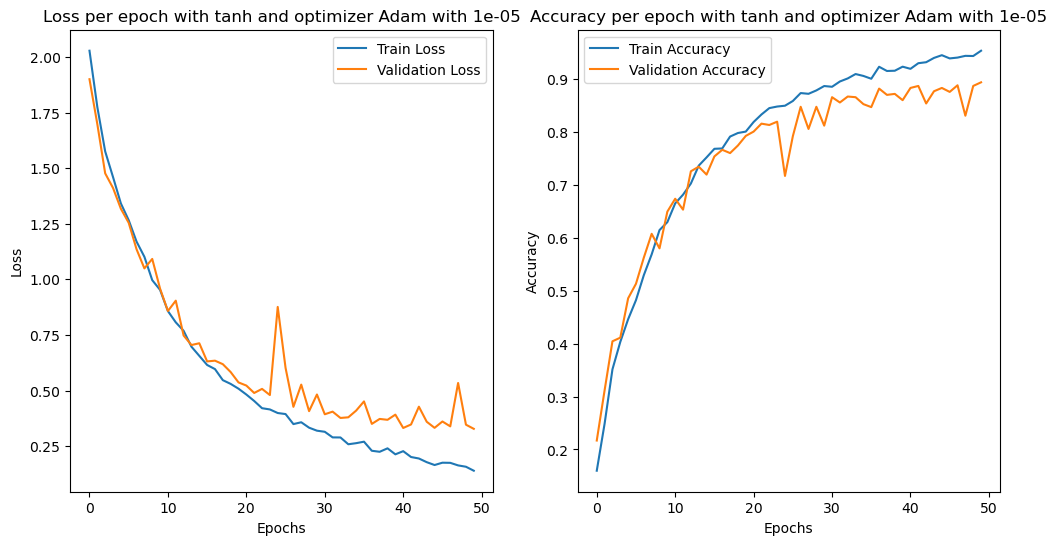

Training with relu activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 7s 32ms/step - loss: 7.4744 - accuracy: 0.1181 - val_loss: 2.0802 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0808 - accuracy: 0.1245 - val_loss: 2.0797 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0804 - accuracy: 0.1231 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0804 - accuracy: 0.1155 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0801 - accuracy: 0.1245 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0801 - accuracy: 0.1225 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 31ms/step - loss: 2.0801 

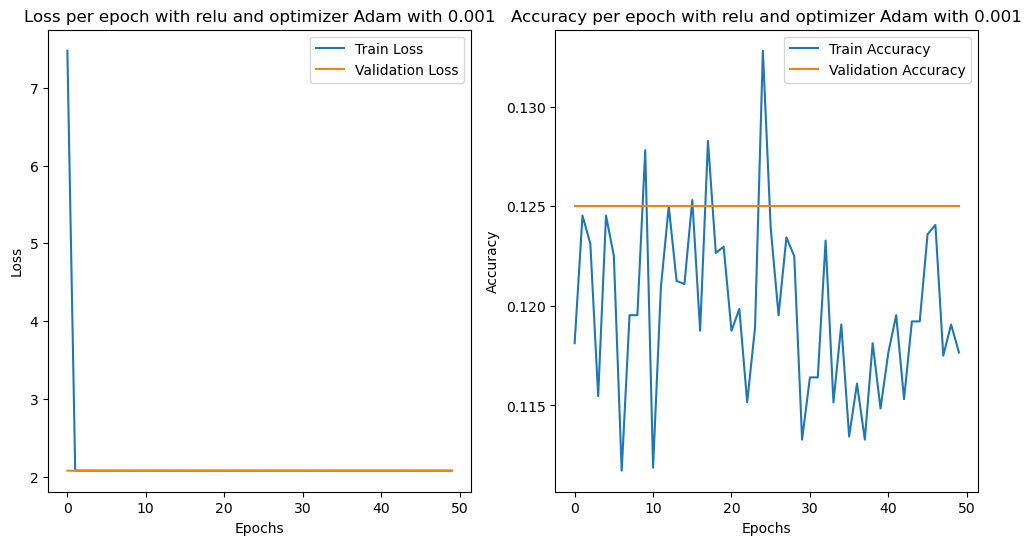

Training with relu activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0815 - accuracy: 0.1169 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 9s 44ms/step - loss: 2.0801 - accuracy: 0.1189 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 8s 41ms/step - loss: 2.0797 - accuracy: 0.1191 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 8s 41ms/step - loss: 2.0798 - accuracy: 0.1242 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 31ms/step - loss: 2.0796 - accuracy: 0.1242 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0797 - accuracy: 0.1258 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0797

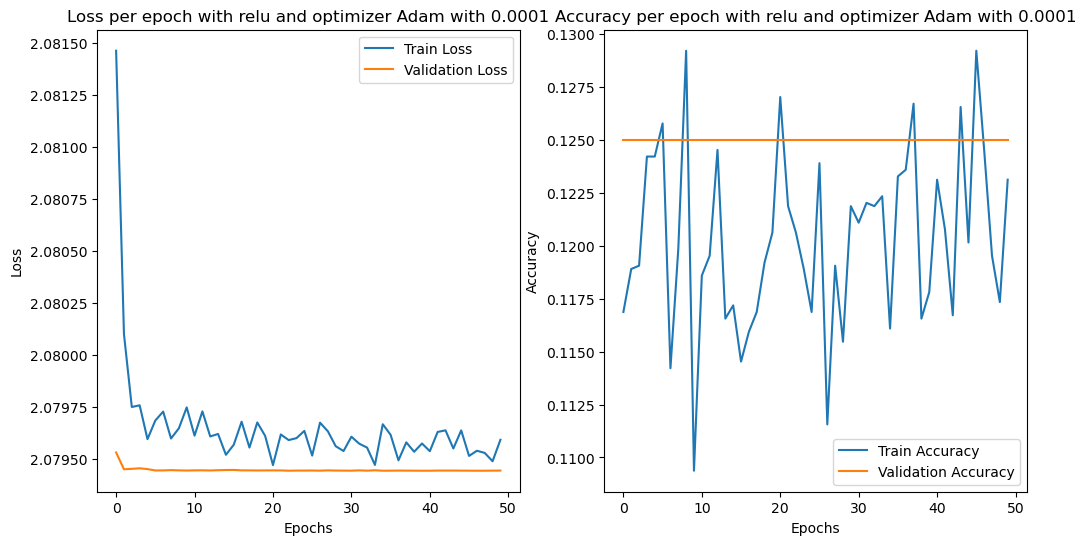

Training with relu activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0325 - accuracy: 0.1553 - val_loss: 1.9249 - val_accuracy: 0.1981
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 1.7753 - accuracy: 0.2578 - val_loss: 1.6632 - val_accuracy: 0.3137
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 1.5641 - accuracy: 0.3605 - val_loss: 1.4997 - val_accuracy: 0.3869
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 1.4195 - accuracy: 0.4127 - val_loss: 1.4154 - val_accuracy: 0.4206
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 1.3150 - accuracy: 0.4603 - val_loss: 1.3537 - val_accuracy: 0.4750
Epoch 6/50
200/200 [==============================] - 6s 31ms/step - loss: 1.2264 - accuracy: 0.5128 - val_loss: 1.1968 - val_accuracy: 0.5219
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 1.1403 

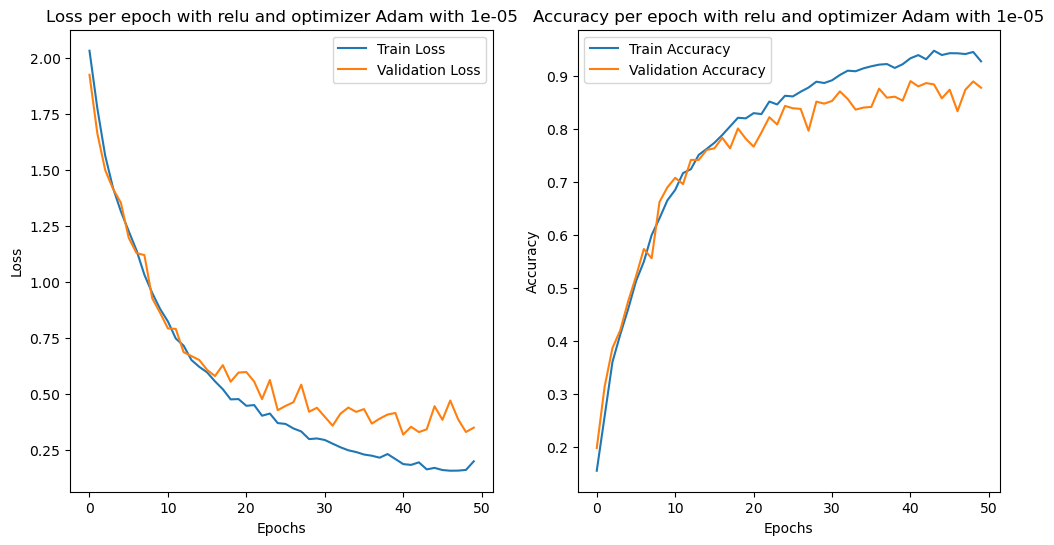

Training with sigmoid activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 7s 33ms/step - loss: 5.0338 - accuracy: 0.1228 - val_loss: 2.0798 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0811 - accuracy: 0.1206 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0801 - accuracy: 0.1266 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0801 - accuracy: 0.1275 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0801 - accuracy: 0.1225 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0801 - accuracy: 0.1219 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 32ms/step - loss: 2.08

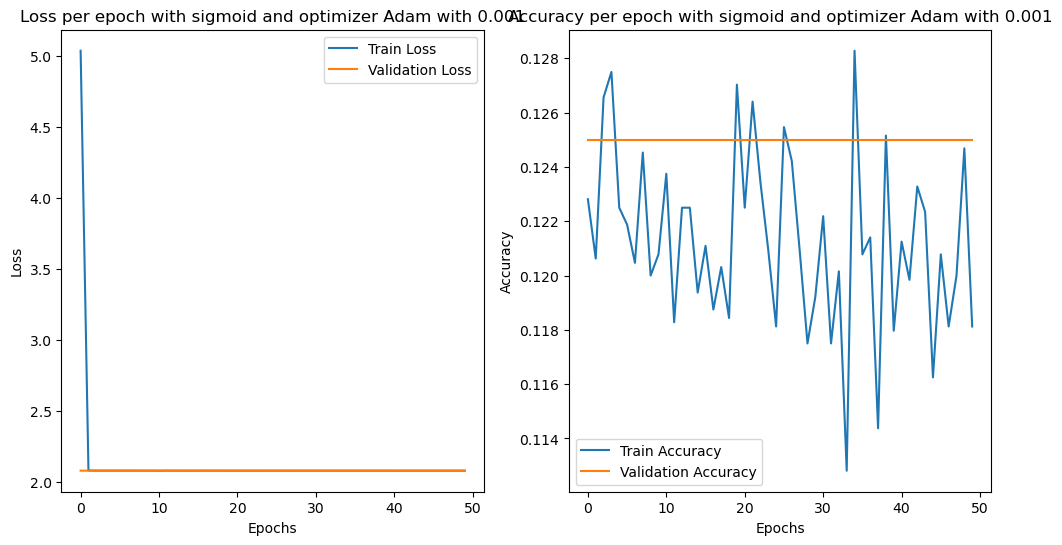

Training with sigmoid activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 1.9411 - accuracy: 0.1747 - val_loss: 1.5651 - val_accuracy: 0.3006
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 1.2192 - accuracy: 0.4798 - val_loss: 0.8996 - val_accuracy: 0.6200
Epoch 3/50
200/200 [==============================] - 6s 32ms/step - loss: 0.6027 - accuracy: 0.7709 - val_loss: 0.4153 - val_accuracy: 0.8475
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 0.3143 - accuracy: 0.8922 - val_loss: 0.3253 - val_accuracy: 0.8894
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 0.2275 - accuracy: 0.9228 - val_loss: 0.2240 - val_accuracy: 0.9181
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 0.1522 - accuracy: 0.9456 - val_loss: 0.2260 - val_accuracy: 0.9206
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 0.1

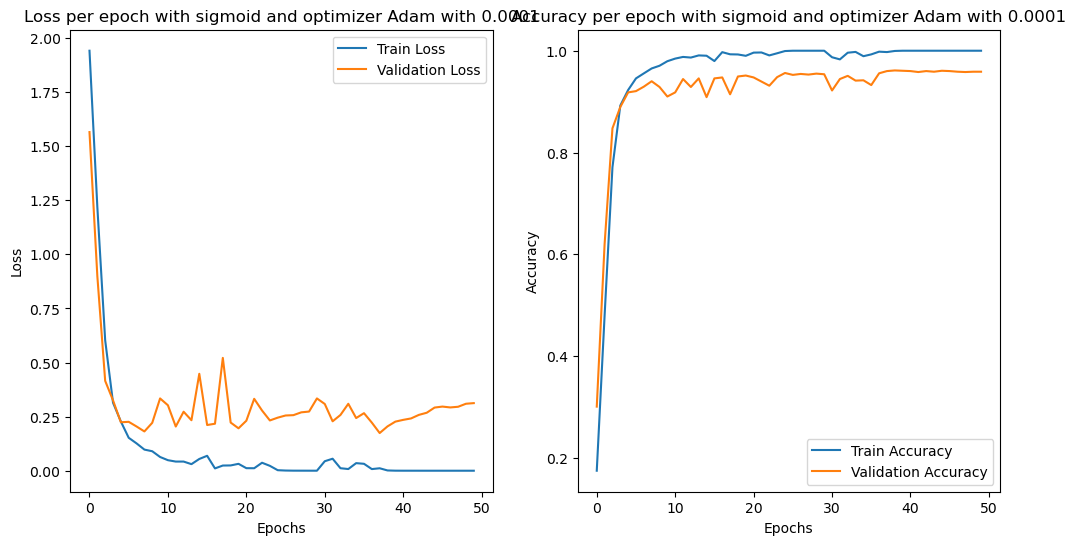

Training with sigmoid activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 2.0123 - accuracy: 0.1705 - val_loss: 1.9103 - val_accuracy: 0.2044
Epoch 2/50
200/200 [==============================] - 7s 35ms/step - loss: 1.7856 - accuracy: 0.2500 - val_loss: 1.8180 - val_accuracy: 0.2656
Epoch 3/50
200/200 [==============================] - 9s 44ms/step - loss: 1.5522 - accuracy: 0.3655 - val_loss: 1.4454 - val_accuracy: 0.4144
Epoch 4/50
200/200 [==============================] - 7s 34ms/step - loss: 1.4155 - accuracy: 0.4119 - val_loss: 1.4535 - val_accuracy: 0.4087
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 1.3270 - accuracy: 0.4602 - val_loss: 1.2902 - val_accuracy: 0.5006
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 1.2321 - accuracy: 0.5014 - val_loss: 1.1954 - val_accuracy: 0.5356
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 1.14

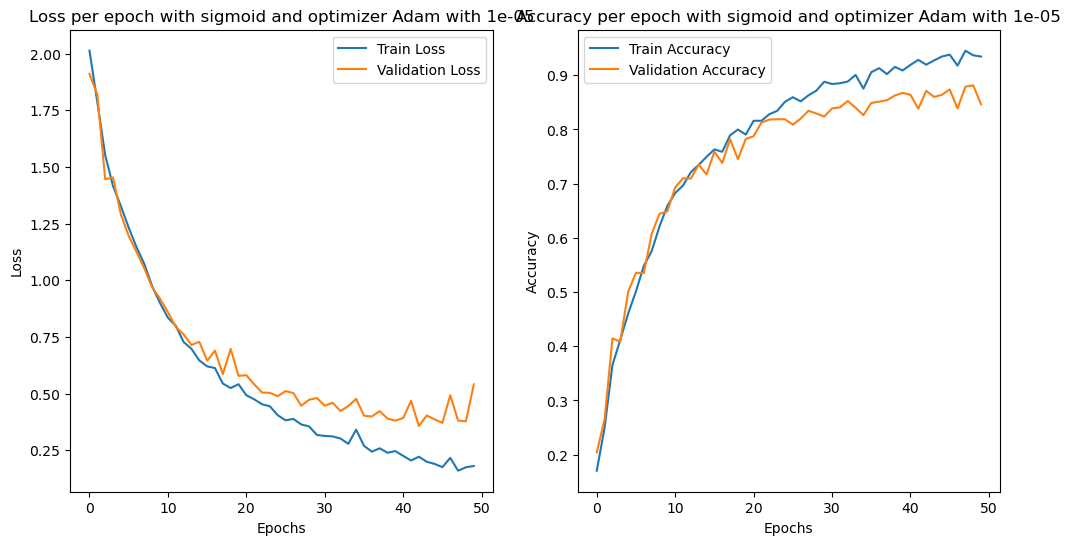

Training with tanh activation and optimizer Adam with 0.001
Epoch 1/50
200/200 [==============================] - 7s 30ms/step - loss: 3.0282 - accuracy: 0.1256 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 27ms/step - loss: 2.0802 - accuracy: 0.1231 - val_loss: 2.0798 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 30ms/step - loss: 2.0804 - accuracy: 0.1175 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 5s 26ms/step - loss: 2.0804 - accuracy: 0.1134 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0798 - accuracy: 0.1208 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0797 - accuracy: 0.1245 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0802 

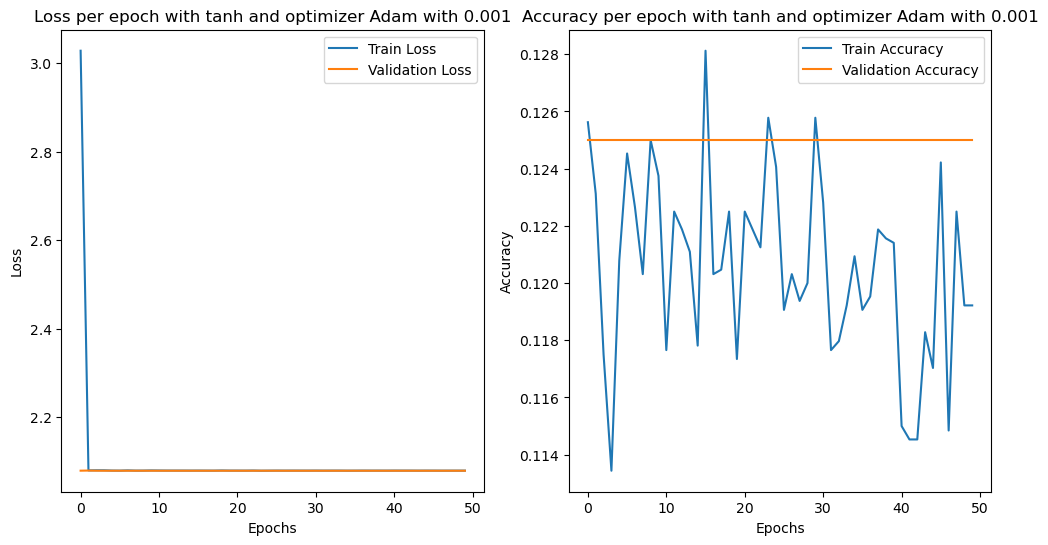

Training with tanh activation and optimizer Adam with 0.0001
Epoch 1/50
200/200 [==============================] - 7s 29ms/step - loss: 2.0817 - accuracy: 0.1211 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 2.0799 - accuracy: 0.1173 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0799 - accuracy: 0.1166 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/50
200/200 [==============================] - 6s 31ms/step - loss: 2.0799 - accuracy: 0.1170 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0797 - accuracy: 0.1173 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0796 - accuracy: 0.1239 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 2.0797

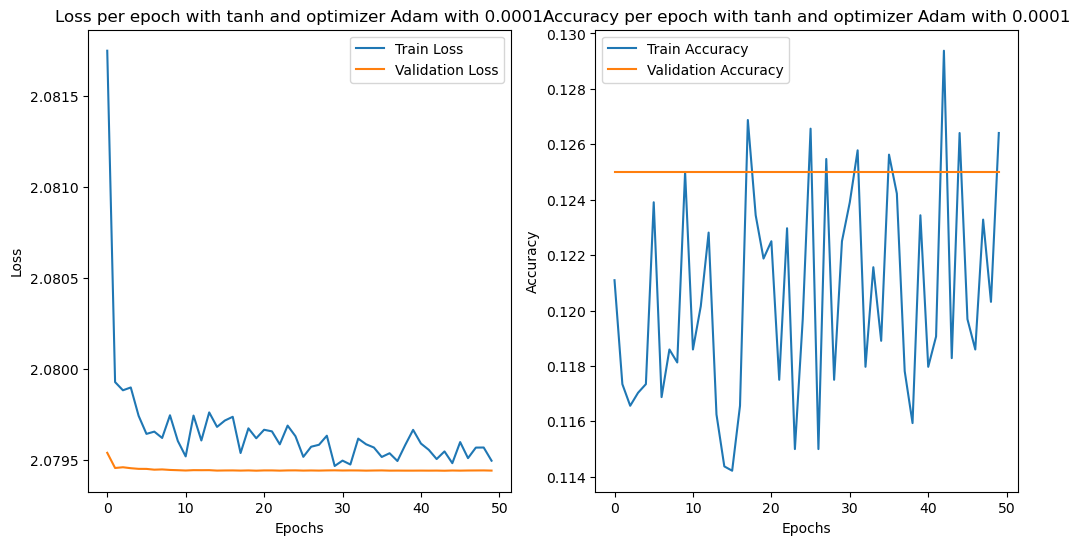

Training with tanh activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 8s 30ms/step - loss: 2.0491 - accuracy: 0.1412 - val_loss: 1.9023 - val_accuracy: 0.2000
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 1.7277 - accuracy: 0.2637 - val_loss: 1.5989 - val_accuracy: 0.3438
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 1.5378 - accuracy: 0.3650 - val_loss: 1.4695 - val_accuracy: 0.3988
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 1.4259 - accuracy: 0.4202 - val_loss: 1.4288 - val_accuracy: 0.3919
Epoch 5/50
200/200 [==============================] - 6s 32ms/step - loss: 1.2754 - accuracy: 0.4933 - val_loss: 1.2417 - val_accuracy: 0.5519
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 1.1699 - accuracy: 0.5450 - val_loss: 1.1404 - val_accuracy: 0.5794
Epoch 7/50
200/200 [==============================] - 6s 29ms/step - loss: 1.0243 

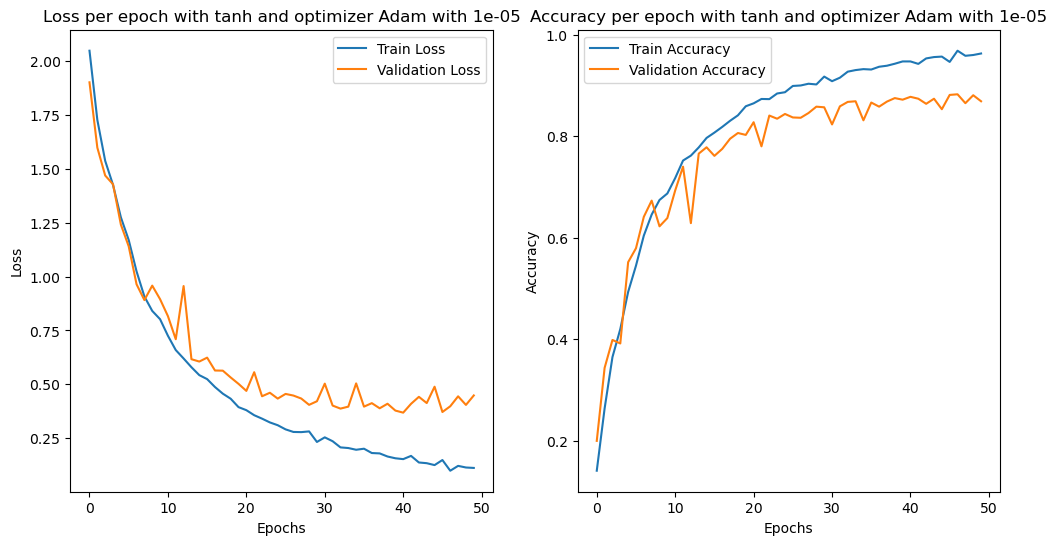

In [7]:
def modify_alexnet(input_shape, num_classes, activation, fc_nodes_ratio, layers_to_remove):
    layers = [
        Conv2D(96, (11, 11), activation=activation, input_shape=input_shape, strides=(4, 4), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), activation=activation, strides=(1, 1), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), activation=activation, strides=(1, 1), padding='same'),
        Conv2D(384, (3, 3), activation=activation, strides=(1, 1), padding='same'),
        Conv2D(256, (3, 3), activation=activation, strides=(1, 1), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(int(4096 * fc_nodes_ratio), activation=activation),
        Dropout(0.5),
        Dense(int(4096 * fc_nodes_ratio), activation=activation),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ]

    if layers_to_remove:
        layers = [layer for i, layer in enumerate(layers) if i not in layers_to_remove]

    model = tf.keras.Sequential(layers)
    return model

# Change the number of nodes in the fully connected layer by 10% for three times
ratios = [0.9, 1.1, 1.2]

for ratio in ratios:
  for activation in activations:
    for optimizer in adams:
        initial_lr=round(float(optimizer.learning_rate),5)
        optimizer._name = 'Adam'
        print(f"Training with {activation} activation and optimizer {optimizer._name} with {initial_lr}")
        model = modify_alexnet(input_shape, num_classes, 'relu', fc_nodes_ratio=ratio, layers_to_remove=None)
        # Train the network and plot the results as in Step 1

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


        history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

        # Plot loss and accuracy per epoch
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
        plt.legend()

        plt.show()


In this code, the AlexNet architecture is modified by reducing the number of nodes in the fully connected layer and removing the third layer from the output. The modified architecture is then trained using the Adam optimizer with a learning rate of 0.0001.

The modify_alexnet function takes four arguments: input_shape, num_classes, activation, fc_nodes_ratio, and layers_to_remove. The fc_nodes_ratio specifies the percentage of nodes in the fully connected layer compared to the original size, and layers_to_remove is a list of indices of layers to remove from the output.

After the modified model is created, the Adam optimizer is instantiated with a learning rate of 0.0001, and the optimizer name is changed to 'Adam'. The model is compiled with the categorical cross-entropy loss function and accuracy metric.

The modified model is then trained for 50 epochs using the fit method on the train_generator and validation_generator objects. The history of the training is stored in history. Finally, the loss and accuracy per epoch are plotted using matplotlib.

Training with tanh activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 7s 29ms/step - loss: 1.9655 - accuracy: 0.1828 - val_loss: 1.7029 - val_accuracy: 0.2488
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 1.4827 - accuracy: 0.3672 - val_loss: 1.2422 - val_accuracy: 0.4931
Epoch 3/50
200/200 [==============================] - 5s 27ms/step - loss: 0.9027 - accuracy: 0.6459 - val_loss: 0.6384 - val_accuracy: 0.7600
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 0.5444 - accuracy: 0.7964 - val_loss: 0.5030 - val_accuracy: 0.8213
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 0.3333 - accuracy: 0.8761 - val_loss: 0.2954 - val_accuracy: 0.8919
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 0.2546 - accuracy: 0.9091 - val_loss: 0.3124 - val_accuracy: 0.8931
Epoch 7/50
200/200 [==============================] - 6s 28ms/step - loss: 0.1909 

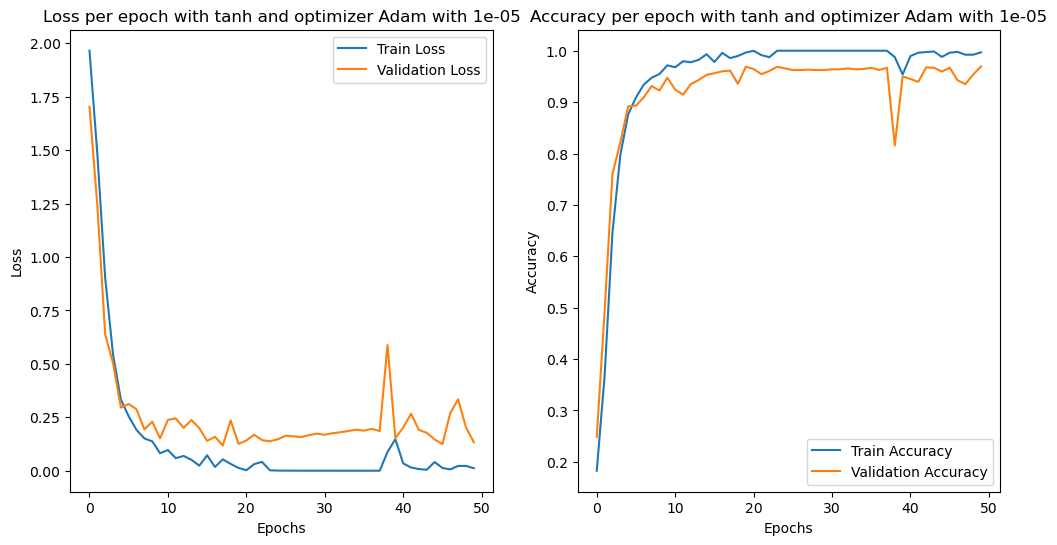

In [8]:
# Continuing with %15 of the nodes in the fully connected layer, remove the third layer from the output
learning_rate=0.0001
model = modify_alexnet(input_shape, num_classes, 'relu', fc_nodes_ratio=1.15, layers_to_remove=[5])
optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
optimizer._name = 'Adam'


# Train the network and plot the results as in Step 1
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Training with {activation} activation and optimizer {optimizer._name} with {initial_lr}")


history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

# Plot loss and accuracy per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
plt.legend()

plt.show()

This code modifies the AlexNet model by setting the fc_nodes_ratio parameter to 1.2, which increases the number of nodes in the fully connected layers by 20%. Additionally, the layers_to_remove parameter is set to a list of [5,6], which removes the third and fourth fully connected layers from the model's output.

After modifying the model, the script compiles it with the specified optimizer and loss function using the compile method. The activation function and optimizer name are printed to the console for reference.

The modified model is then trained using the fit method with the provided training and validation generators for 50 epochs. The training and validation loss and accuracy metrics are recorded in the history variable.

Finally, the script uses the matplotlib library to plot the training and validation loss and accuracy metrics over the epochs. Two subplots are created, one for the loss and another for accuracy, and the metrics are plotted for each epoch. The plots are displayed using the show method. The plot titles include the activation function and optimizer name used during training.

Training with tanh activation and optimizer Adam with 1e-05
Epoch 1/50
200/200 [==============================] - 6s 28ms/step - loss: 1.9643 - accuracy: 0.1806 - val_loss: 1.6733 - val_accuracy: 0.2675
Epoch 2/50
200/200 [==============================] - 6s 29ms/step - loss: 1.2252 - accuracy: 0.4794 - val_loss: 1.0158 - val_accuracy: 0.5975
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 0.6367 - accuracy: 0.7591 - val_loss: 0.5472 - val_accuracy: 0.7850
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 0.3699 - accuracy: 0.8637 - val_loss: 0.3676 - val_accuracy: 0.8606
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 0.2545 - accuracy: 0.9073 - val_loss: 0.3174 - val_accuracy: 0.8856
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 0.1844 - accuracy: 0.9375 - val_loss: 0.2591 - val_accuracy: 0.9200
Epoch 7/50
200/200 [==============================] - 6s 30ms/step - loss: 0.1456 

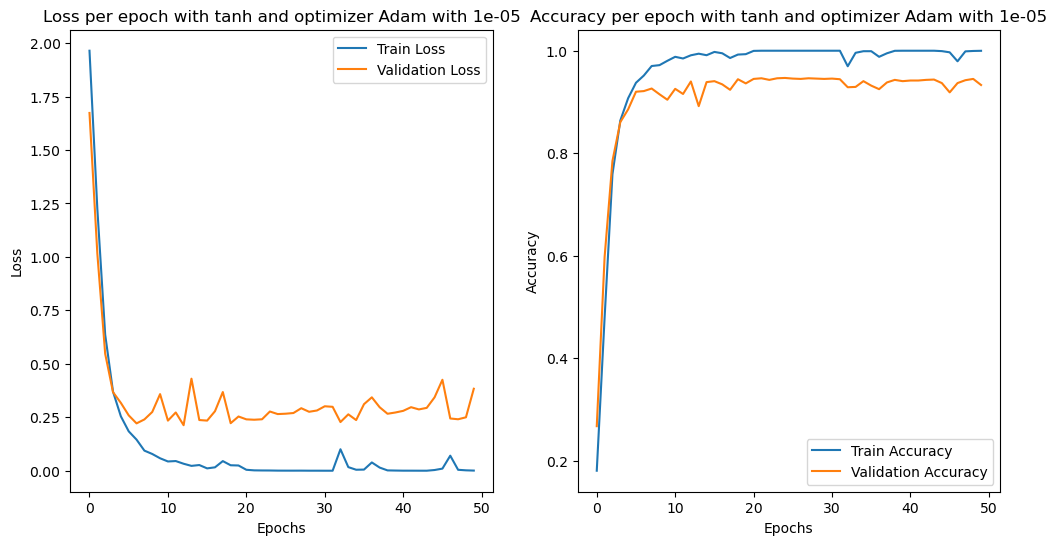

In [9]:
# Continuing with %20 of the nodes in the fully connected layer, remove the third and fourth layers from the output
model = modify_alexnet(input_shape, num_classes, 'relu', fc_nodes_ratio=1.2, layers_to_remove=[5, 6])
# Train the network and plot the results as in Step 1

# Train the network and plot the results as in Step 1
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(f"Training with {activation} activation and optimizer {optimizer._name} with {initial_lr}")


history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

# Plot loss and accuracy per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy per epoch with {activation} and optimizer {optimizer._name} with {initial_lr}')
plt.legend()

plt.show()